In [34]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
df = pd.read_csv('D:/SMU/Data Analytics/Datasets/world_stats.csv')
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.38,0.24,0.38
1,Albania,ASIA (EX. NEAR EAST),147365352,144000,1023.4,0.40,-0.71,62.60,1900.0,43.1,7.3,62.11,3.07,34.82,2.0,29.80,8.27,0.20,0.20,0.60
2,Algeria,ASIA (EX. NEAR EAST),2279723,47000,48.5,0.00,0.00,100.44,1300.0,42.2,14.3,3.09,0.43,96.48,2.0,33.65,12.70,0.26,0.38,0.36
3,American Samoa,ASIA (EX. NEAR EAST),379444,5770,65.8,2.79,3.59,12.61,18600.0,93.9,237.2,0.57,0.76,98.67,2.0,18.79,3.45,0.04,0.56,0.40
4,Andorra,ASIA (EX. NEAR EAST),47382633,678500,69.8,0.28,-1.80,67.24,1800.0,85.3,10.1,15.19,0.97,83.84,2.0,17.91,9.83,0.56,0.08,0.35


In [3]:
df.rename(columns={'Area (sq. mi.)':'Land Area','Pop. Density (per sq. mi.)':'Pop. Density','Coastline (coast/area ratio)':'Coastline Ratio','Infant mortality (per 1000 births)':'Infant mortality','GDP ($ per capita)':'GDP per capita','Literacy (%)':'Literacy','Phones (per 1000)':'Phones per 1000','Arable (%)':'Arable','Crops (%)':'Crops','Other (%)':'Others'},inplace=True)

In [4]:
df.isnull().sum()

Country              0
Region               0
Population           0
Land Area            0
Pop. Density         0
Coastline Ratio      0
Net migration        3
Infant mortality     3
GDP per capita       1
Literacy            18
Phones per 1000      4
Arable               2
Crops                2
Others               2
Climate             22
Birthrate            3
Deathrate            4
Agriculture         15
Industry            16
Service             15
dtype: int64

In [5]:
df1 = df.dropna(subset=['Net migration','Infant mortality','GDP per capita','Phones per 1000','Literacy','Birthrate','Deathrate'],how='any')

In [6]:
df1['Region'] = df1['Region'].str.strip()
print (df1)

             Country                Region  Population  Land Area  \
0       Afghanistan   ASIA (EX. NEAR EAST)    31056997     647500   
1           Albania   ASIA (EX. NEAR EAST)   147365352     144000   
2           Algeria   ASIA (EX. NEAR EAST)     2279723      47000   
3    American Samoa   ASIA (EX. NEAR EAST)      379444       5770   
4           Andorra   ASIA (EX. NEAR EAST)    47382633     678500   
..               ...                   ...         ...        ...   
222       West Bank         WESTERN EUROPE       29251         61   
223  Western Sahara         WESTERN EUROPE    40397842     504782   
224           Yemen         WESTERN EUROPE     9016596     449964   
225          Zambia         WESTERN EUROPE     7523934      41290   
226        Zimbabwe         WESTERN EUROPE    60609153     244820   

     Pop. Density  Coastline Ratio  Net migration  Infant mortality  \
0            48.0             0.00          23.06            163.07   
1          1023.4            

<ipython-input-6-c4b038eae363>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Region'] = df1['Region'].str.strip()


C:\Users\hongeeleow\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


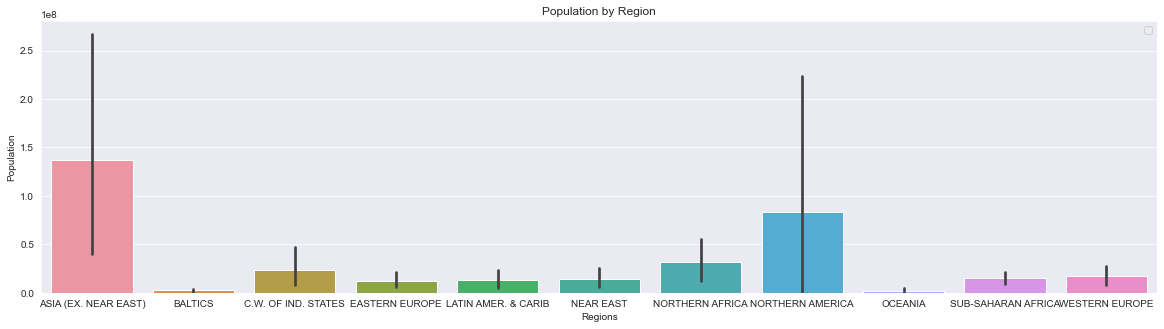

In [39]:
sns.set_style("darkgrid")
sns.barplot(df1['Region'],df1['Population'],data=df1)
plt.title('Population by Region')
plt.xlabel('Regions')
plt.ylabel('Population')
plt.legend()
plt.rcParams["figure.figsize"] = (20,20)
plt.show()

C:\Users\hongeeleow\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


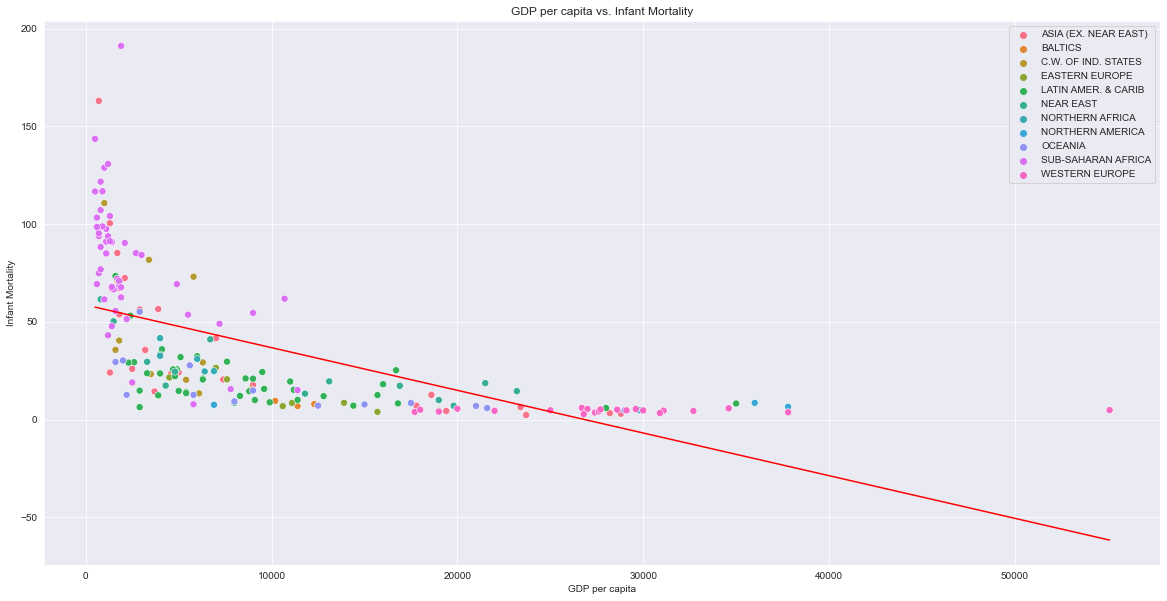

[[ 1.       -0.613776]
 [-0.613776  1.      ]]


In [51]:
#GDP per capita vs. Infant Mortality: weak negative correlation (investigate further)
sns.set_style("darkgrid")
sns.scatterplot(df1['GDP per capita'],df1['Infant mortality'],hue=df1['Region'],s=50)
plt.title('GDP per capita vs. Infant Mortality')
plt.xlabel('GDP per capita')
plt.ylabel('Infant Mortality')
plt.legend()
plt.plot(np.unique(df1['GDP per capita']), np.poly1d(np.polyfit(df1['GDP per capita'],df1['Infant mortality'], 1))(np.unique(df1['GDP per capita'])), color='red')
plt.rcParams["figure.figsize"] = (20,20)
plt.show()

print(np.corrcoef(df1['GDP per capita'],df1['Infant mortality']))

C:\Users\hongeeleow\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


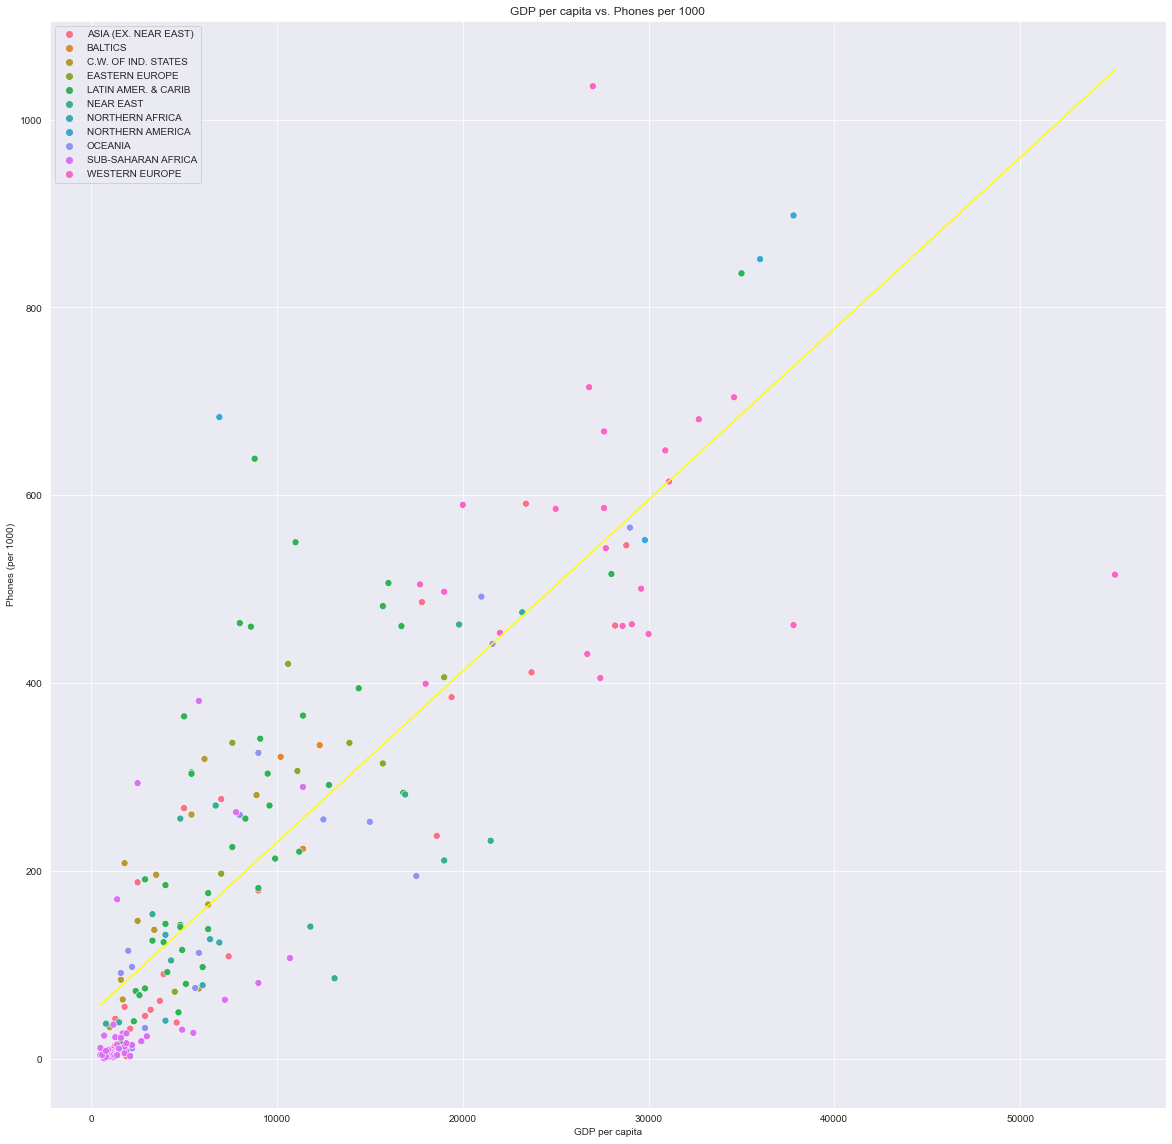

[[1.         0.84866812]
 [0.84866812 1.        ]]


In [59]:
#GDP per capita vs. Phones per 1000: positive correlation
sns.set_style("darkgrid")
sns.scatterplot(df1['GDP per capita'],df1['Phones per 1000'],hue=df1['Region'],s=50)
plt.title('GDP per capita vs. Phones per 1000')
plt.xlabel('GDP per capita')
plt.ylabel('Phones (per 1000)')
plt.legend()
plt.plot(np.unique(df1['GDP per capita']), np.poly1d(np.polyfit(df1['GDP per capita'],df1['Phones per 1000'], 1))(np.unique(df1['GDP per capita'])), color='yellow')
plt.rcParams["figure.figsize"] = (20,20)
plt.show()

print(np.corrcoef(df1['GDP per capita'],df1['Phones per 1000']))

C:\Users\hongeeleow\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


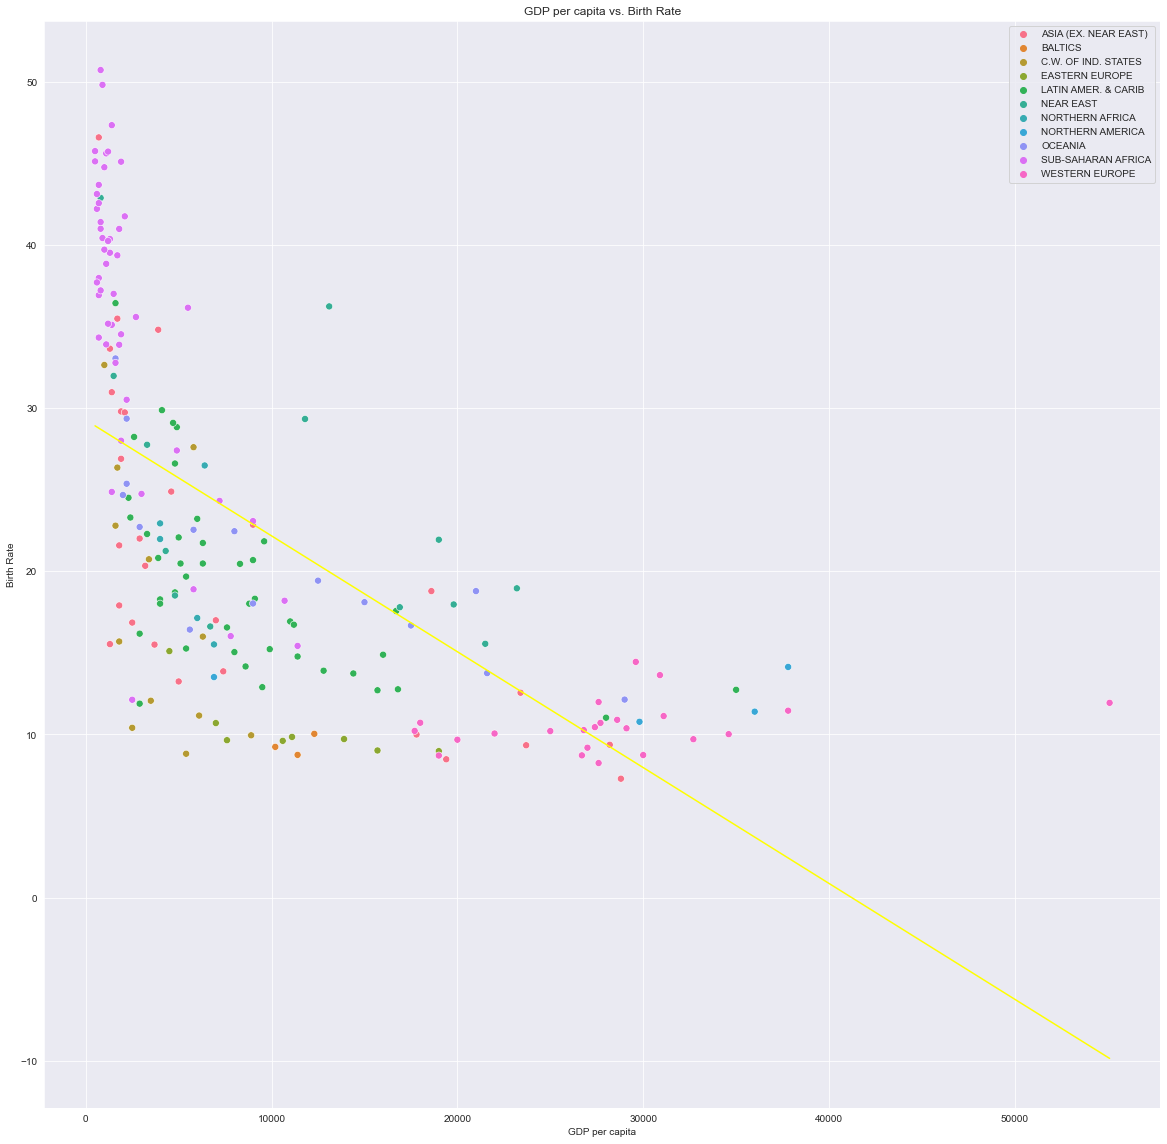

[[ 1.         -0.64370431]
 [-0.64370431  1.        ]]


In [60]:
#GDP per capita vs. Birth Rate: somewhat negative correlation (explains why developed countries tend to have fewer children while developing/less developed countries tend to have more children)
sns.set_style("darkgrid")
sns.scatterplot(df1['GDP per capita'],df1['Birthrate'],hue=df1['Region'],s=50)
plt.title('GDP per capita vs. Birth Rate')
plt.xlabel('GDP per capita')
plt.ylabel('Birth Rate')
plt.legend()
plt.plot(np.unique(df1['GDP per capita']), np.poly1d(np.polyfit(df1['GDP per capita'],df1['Birthrate'], 1))(np.unique(df1['GDP per capita'])), color='yellow')
plt.rcParams["figure.figsize"] = (20,20)
plt.show()

print(np.corrcoef(df1['GDP per capita'],df1['Birthrate']))

C:\Users\hongeeleow\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


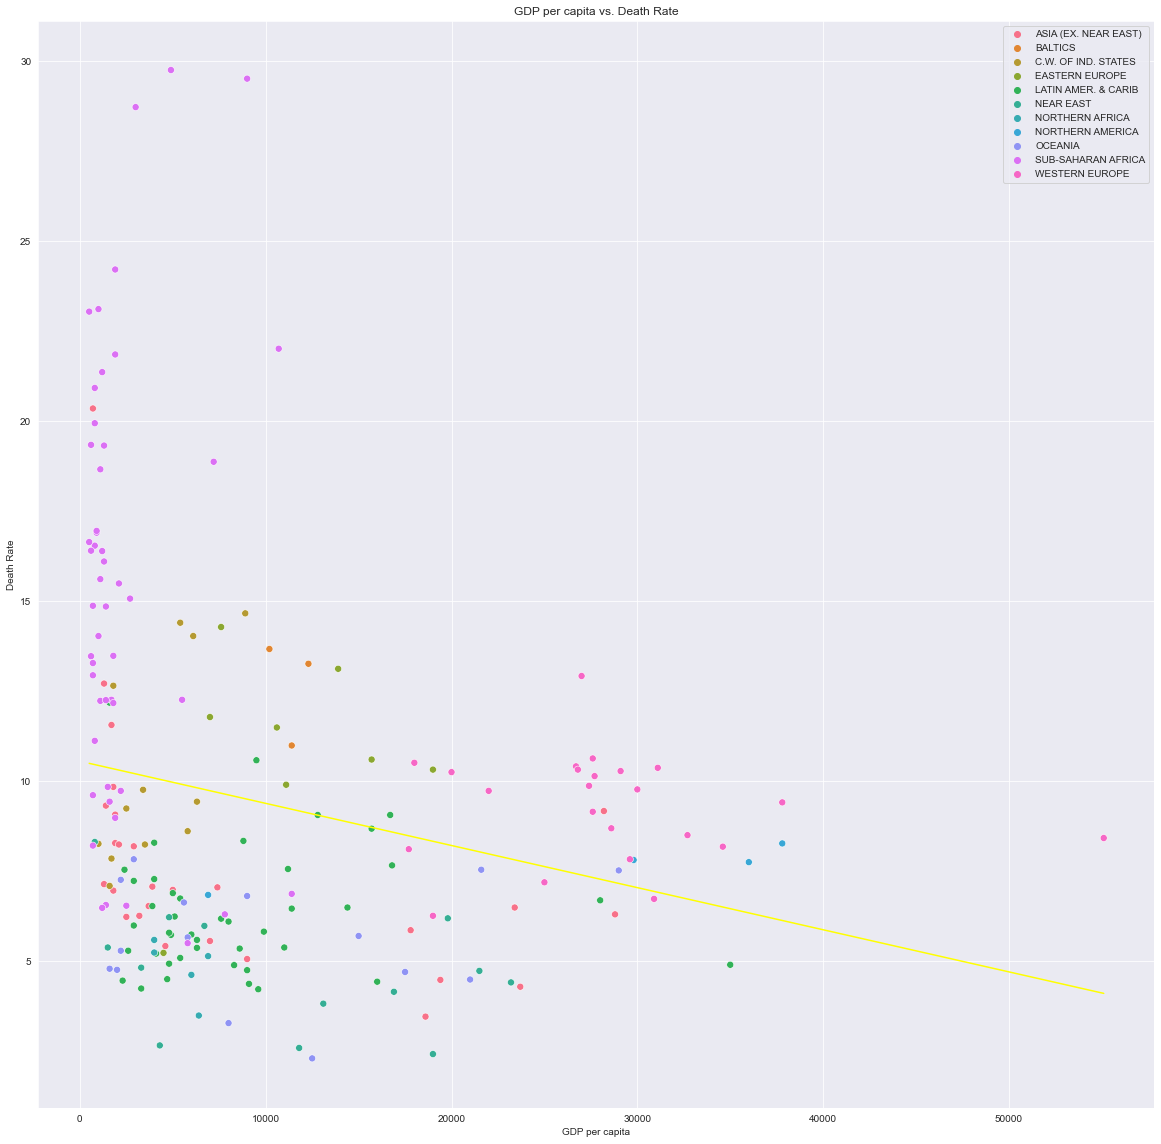

[[ 1.        -0.2313488]
 [-0.2313488  1.       ]]


In [61]:
#GDP per capita vs. Death Rate: weak negative correlation (investigate further)
sns.set_style("darkgrid")
sns.scatterplot(df1['GDP per capita'],df1['Deathrate'],hue=df1['Region'],s=50)
plt.title('GDP per capita vs. Death Rate')
plt.xlabel('GDP per capita')
plt.ylabel('Death Rate')
plt.legend()
plt.plot(np.unique(df1['GDP per capita']), np.poly1d(np.polyfit(df1['GDP per capita'],df1['Deathrate'], 1))(np.unique(df1['GDP per capita'])), color='yellow')
plt.rcParams["figure.figsize"] = (20,20)
plt.show()

print(np.corrcoef(df1['GDP per capita'],df1['Deathrate']))

C:\Users\hongeeleow\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


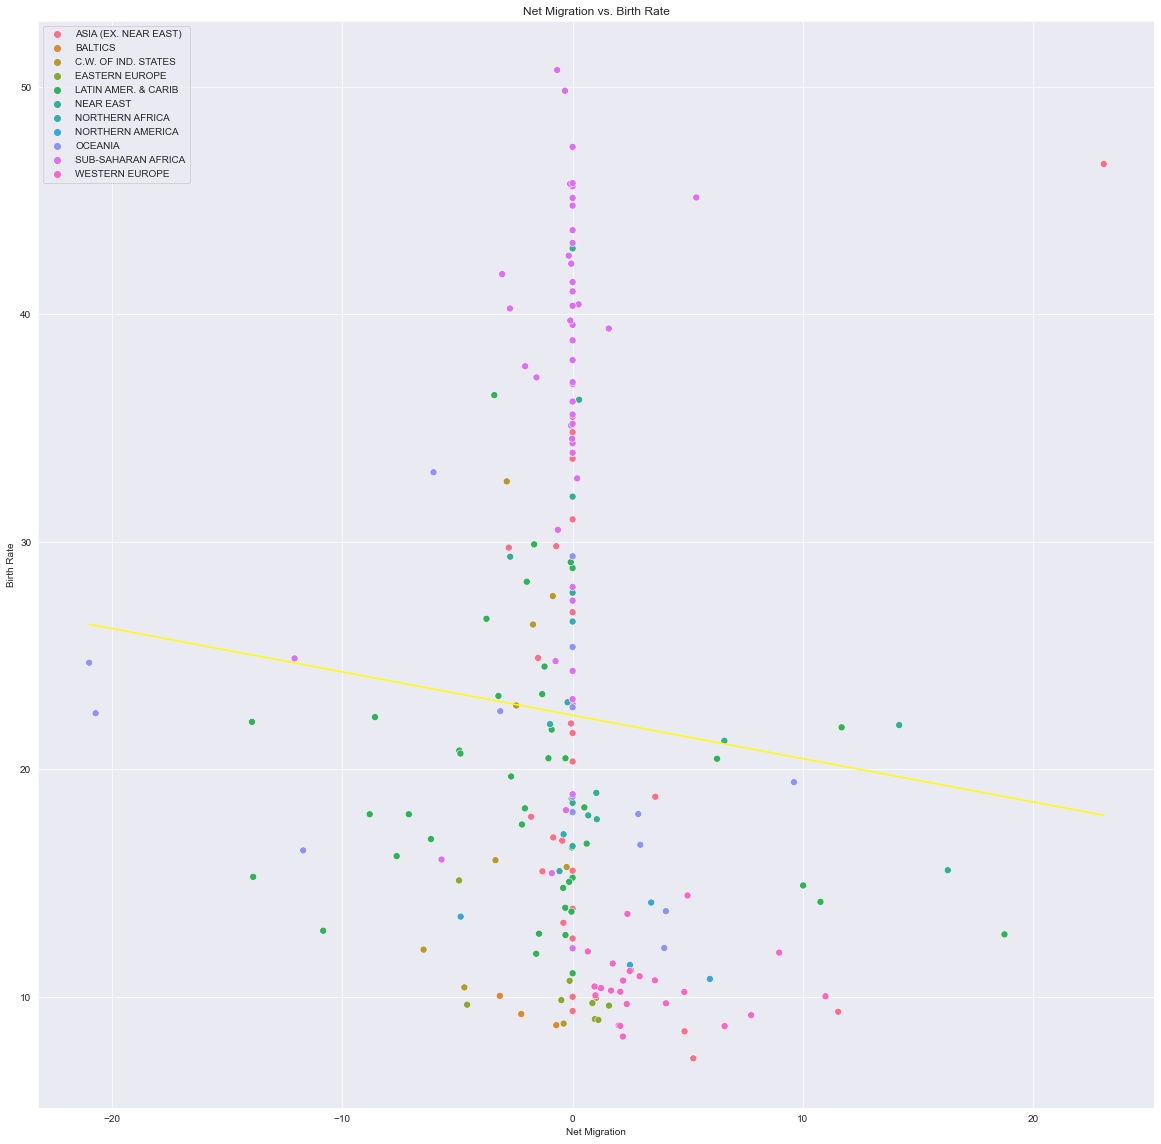

[[ 1.         -0.08472536]
 [-0.08472536  1.        ]]


In [62]:
#Net Migration vs. Birth Rate: no relationship (investigate further): might 
sns.set_style("darkgrid")
sns.scatterplot(df1['Net migration'],df1['Birthrate'],hue=df1['Region'],s=50)
plt.title('Net Migration vs. Birth Rate')
plt.xlabel('Net Migration')
plt.ylabel('Birth Rate')
plt.legend()
plt.plot(np.unique(df1['Net migration']), np.poly1d(np.polyfit(df1['Net migration'],df1['Birthrate'], 1))(np.unique(df1['Net migration'])), color='yellow')
plt.rcParams["figure.figsize"] = (20,20)
plt.show()

print(np.corrcoef(df1['Net migration'],df1['Birthrate']))

C:\Users\hongeeleow\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


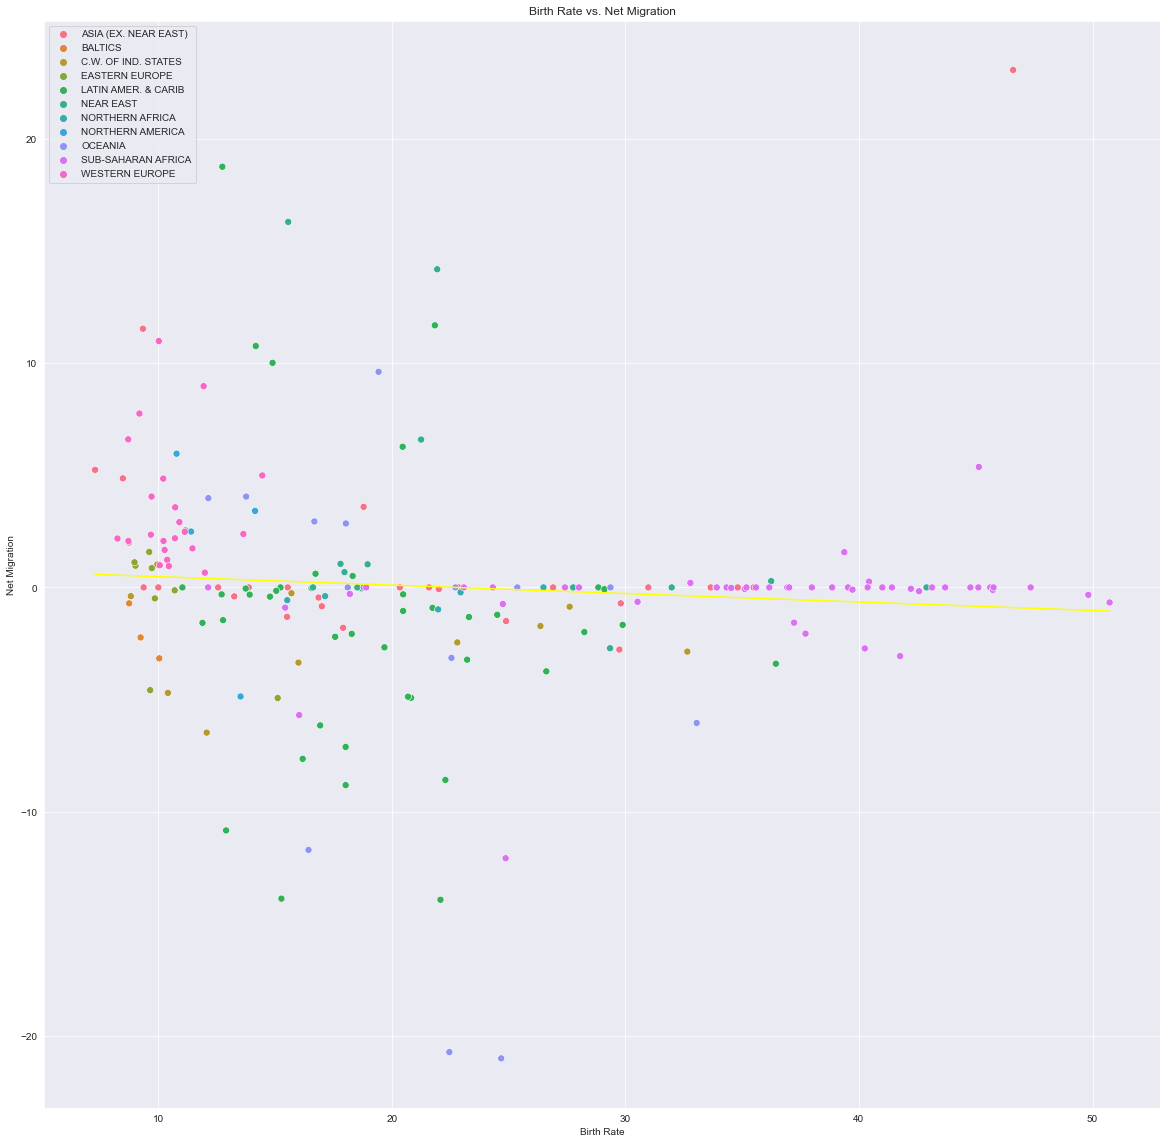

[[ 1.         -0.08472536]
 [-0.08472536  1.        ]]


In [63]:
#Birth Rate vs. Net Migration: no relationship (investigate further): might 
sns.set_style("darkgrid")
sns.scatterplot(df1['Birthrate'],df1['Net migration'],hue=df1['Region'],s=50)
plt.title('Birth Rate vs. Net Migration')
plt.xlabel('Birth Rate')
plt.ylabel('Net Migration')
plt.legend()
plt.plot(np.unique(df1['Birthrate']), np.poly1d(np.polyfit(df1['Birthrate'],df1['Net migration'], 1))(np.unique(df1['Birthrate'])), color='yellow')
plt.rcParams["figure.figsize"] = (20,20)
plt.show()

print(np.corrcoef(df1['Birthrate'],df1['Net migration']))

C:\Users\hongeeleow\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


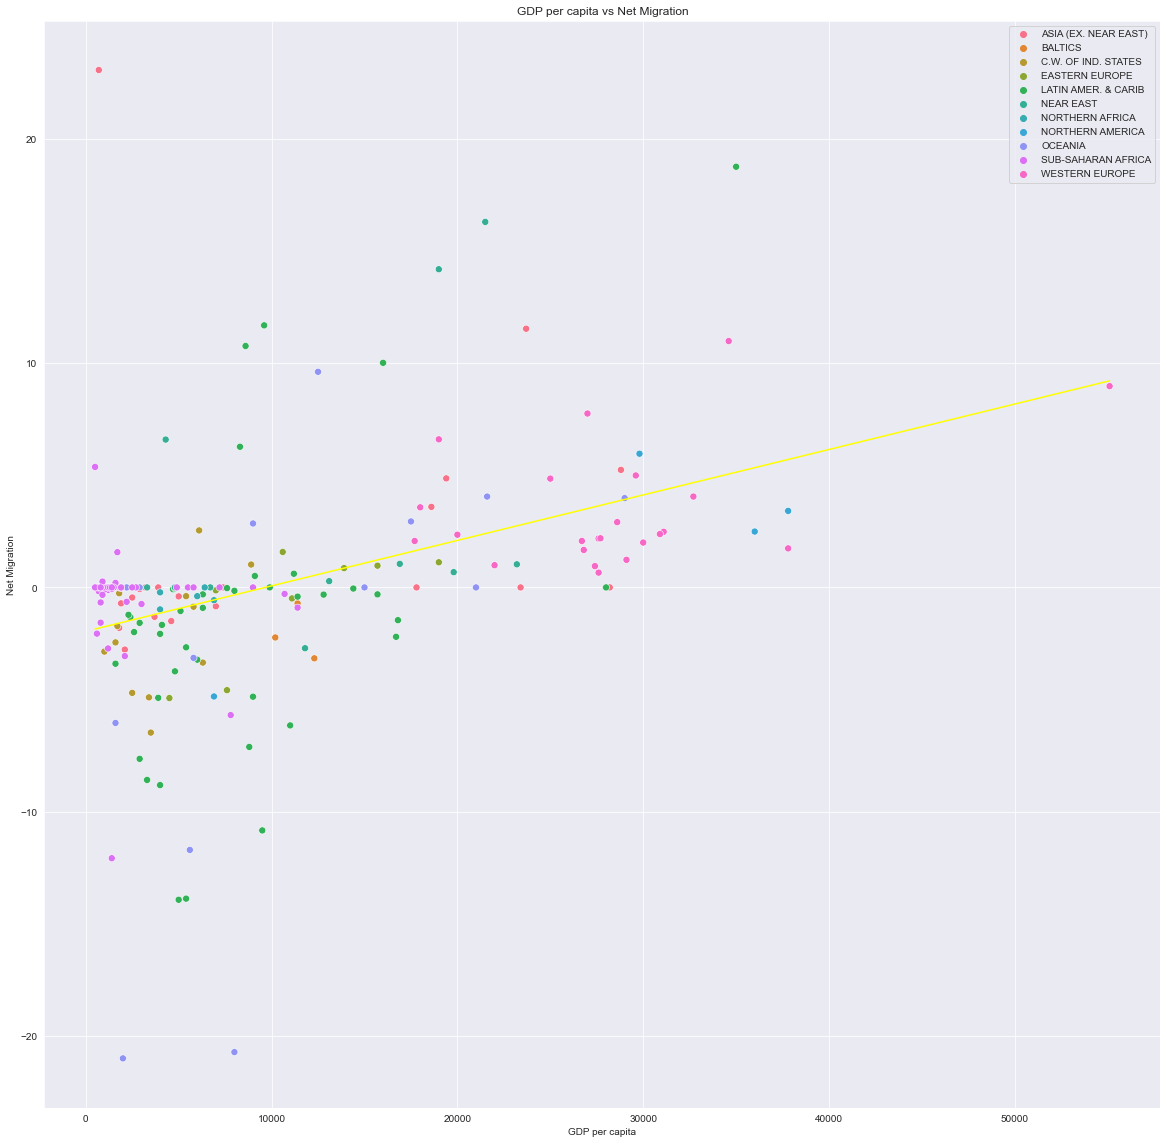

[[1.         0.41319173]
 [0.41319173 1.        ]]


In [64]:
#GDP per capita vs Net Migration:
sns.set_style("darkgrid")
sns.scatterplot(df1['GDP per capita'],df1['Net migration'],hue=df1['Region'],s=50)
plt.title('GDP per capita vs Net Migration')
plt.xlabel('GDP per capita')
plt.ylabel('Net Migration')
plt.legend()
plt.plot(np.unique(df1['GDP per capita']), np.poly1d(np.polyfit(df1['GDP per capita'],df1['Net migration'], 1))(np.unique(df1['GDP per capita'])), color='yellow')
plt.rcParams["figure.figsize"] = (20,20)
plt.show()

print(np.corrcoef(df1['GDP per capita'],df1['Net migration']))

C:\Users\hongeeleow\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


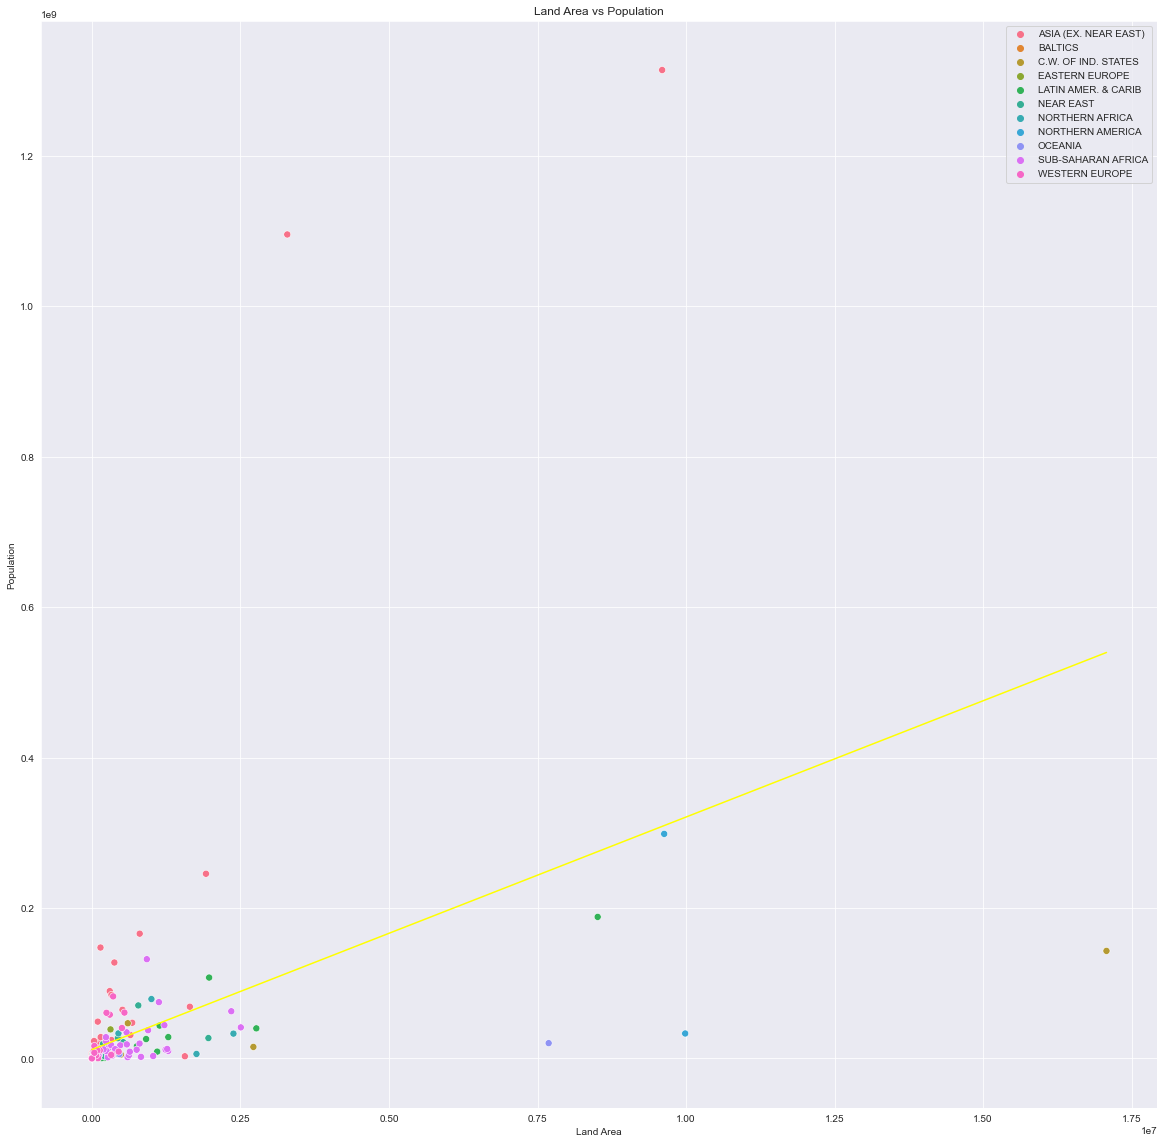

[[1.        0.4675098]
 [0.4675098 1.       ]]


In [65]:
#Land Area vs Population:
sns.set_style("darkgrid")
sns.scatterplot(df1['Land Area'],df1['Population'],hue=df1['Region'],s=50)
plt.title('Land Area vs Population')
plt.xlabel('Land Area')
plt.ylabel('Population')
plt.legend()
plt.plot(np.unique(df1['Land Area']), np.poly1d(np.polyfit(df1['Land Area'],df1['Population'], 1))(np.unique(df1['Land Area'])), color='yellow')
plt.rcParams["figure.figsize"] = (20,20)
plt.show()

print(np.corrcoef(df1['Land Area'],df1['Population']))

In [21]:
#print correlation matrix
corr = df1.corr()
print(corr)

                  Population  Land Area  Pop. Density  Coastline Ratio  \
Population          1.000000   0.467510     -0.026169        -0.061513   
Land Area           0.467510   1.000000     -0.063748        -0.085637   
Pop. Density       -0.026169  -0.063748      1.000000         0.232935   
Coastline Ratio    -0.061513  -0.085637      0.232935         1.000000   
Net migration       0.001274   0.060356      0.178482        -0.152515   
Infant mortality    0.011025  -0.021788     -0.141619        -0.127482   
GDP per capita     -0.041484   0.068735      0.207210         0.050050   
Literacy           -0.044701   0.035986      0.098235         0.119940   
Phones per 1000    -0.021029   0.070184      0.278549         0.137898   
Arable              0.187961  -0.087264     -0.088195        -0.089751   
Crops              -0.060802  -0.148667     -0.048572         0.360620   
Others             -0.125008   0.144087      0.096161        -0.101551   
Climate            -0.019284  -0.09561

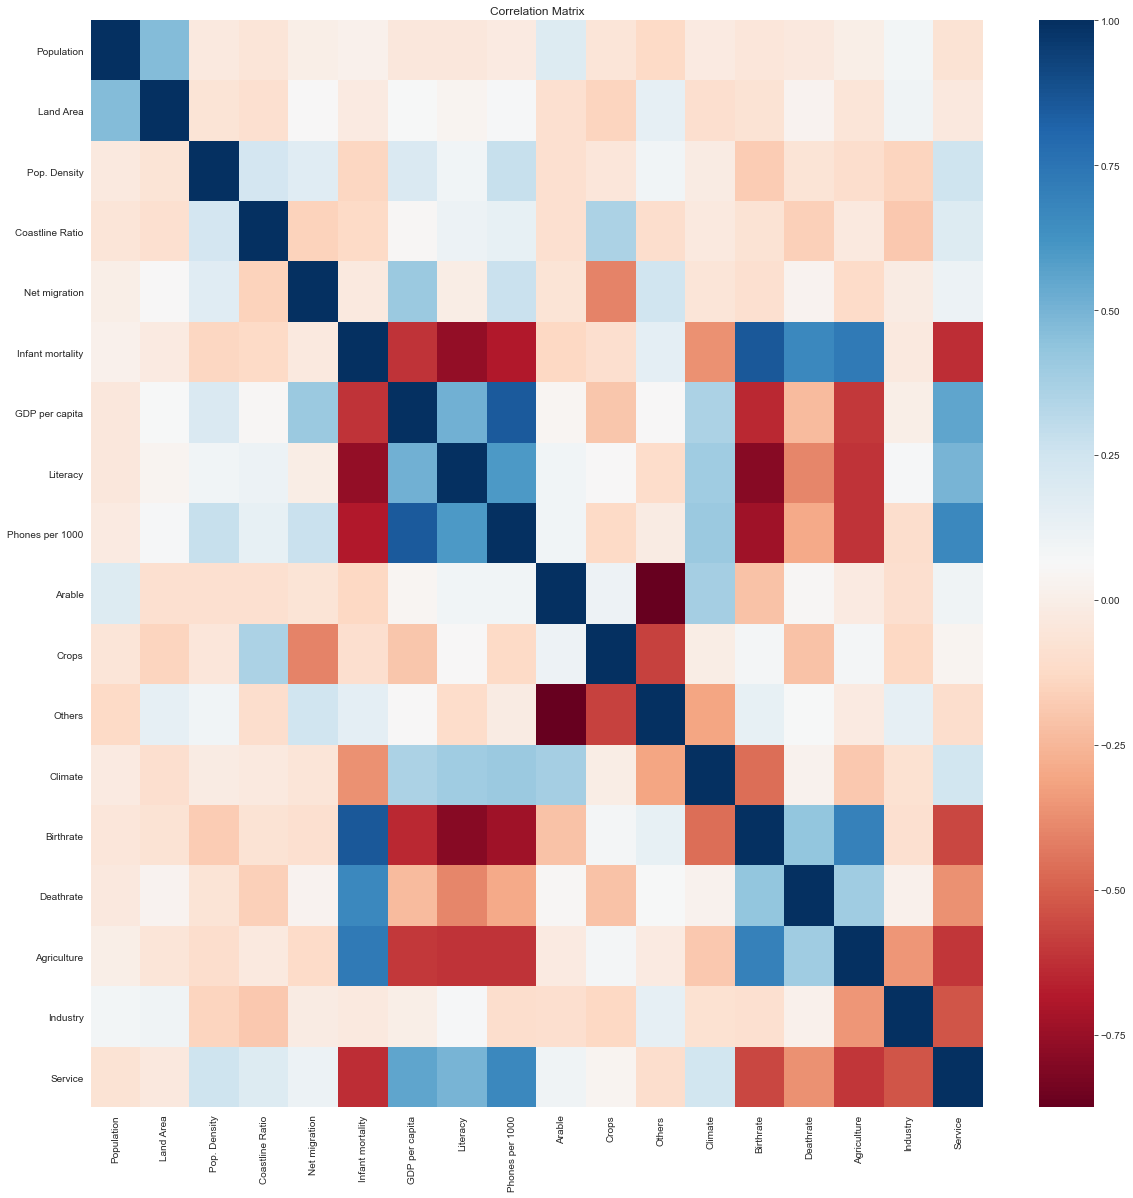

In [72]:
#plot correlation matrix
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap = "RdBu")
plt.title("Correlation Matrix")
plt.rcParams["figure.figsize"] = (5,5)
plt.show()

In [78]:
#Group by Regions

df2 = df1.groupby('Region')[['GDP per capita','Net migration','Birthrate']].mean().reset_index()
df2.index = ['Asia','Baltics','Ind. States','Eastern Europe','Latin America','Near East','Northern Africa','Northern America','Oceania','Sub-Saharan Africa','Western Europe']
df2.sort_values('GDP per capita', axis = 0, ascending = False,
                 inplace = True, na_position ='last')

df2.sort_values('Birthrate', axis = 0, ascending = False,
                 inplace = True, na_position ='last')

df2.sort_values('Net migration', axis = 0, ascending = False,
                 inplace = True, na_position ='last')


C:\Users\hongeeleow\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


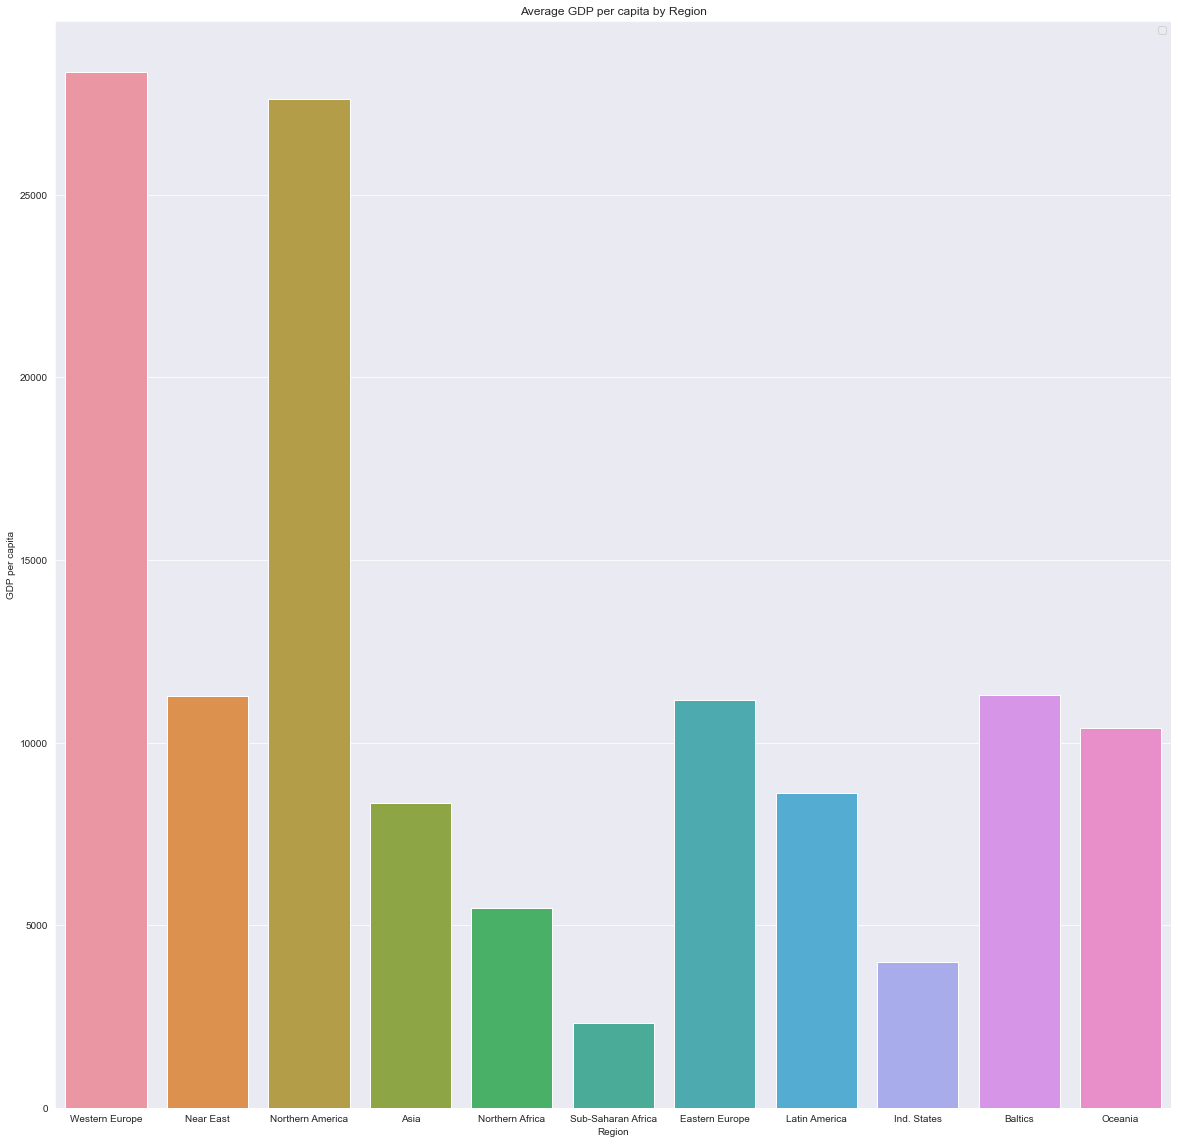

In [79]:
sns.set_style("darkgrid")
sns.barplot(df2.index,'GDP per capita',data=df2)
plt.title('Average GDP per capita by Region')
plt.xlabel('Region')
plt.ylabel('GDP per capita')
plt.legend()
plt.rcParams["figure.figsize"] = (20,20)
plt.show()

C:\Users\hongeeleow\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


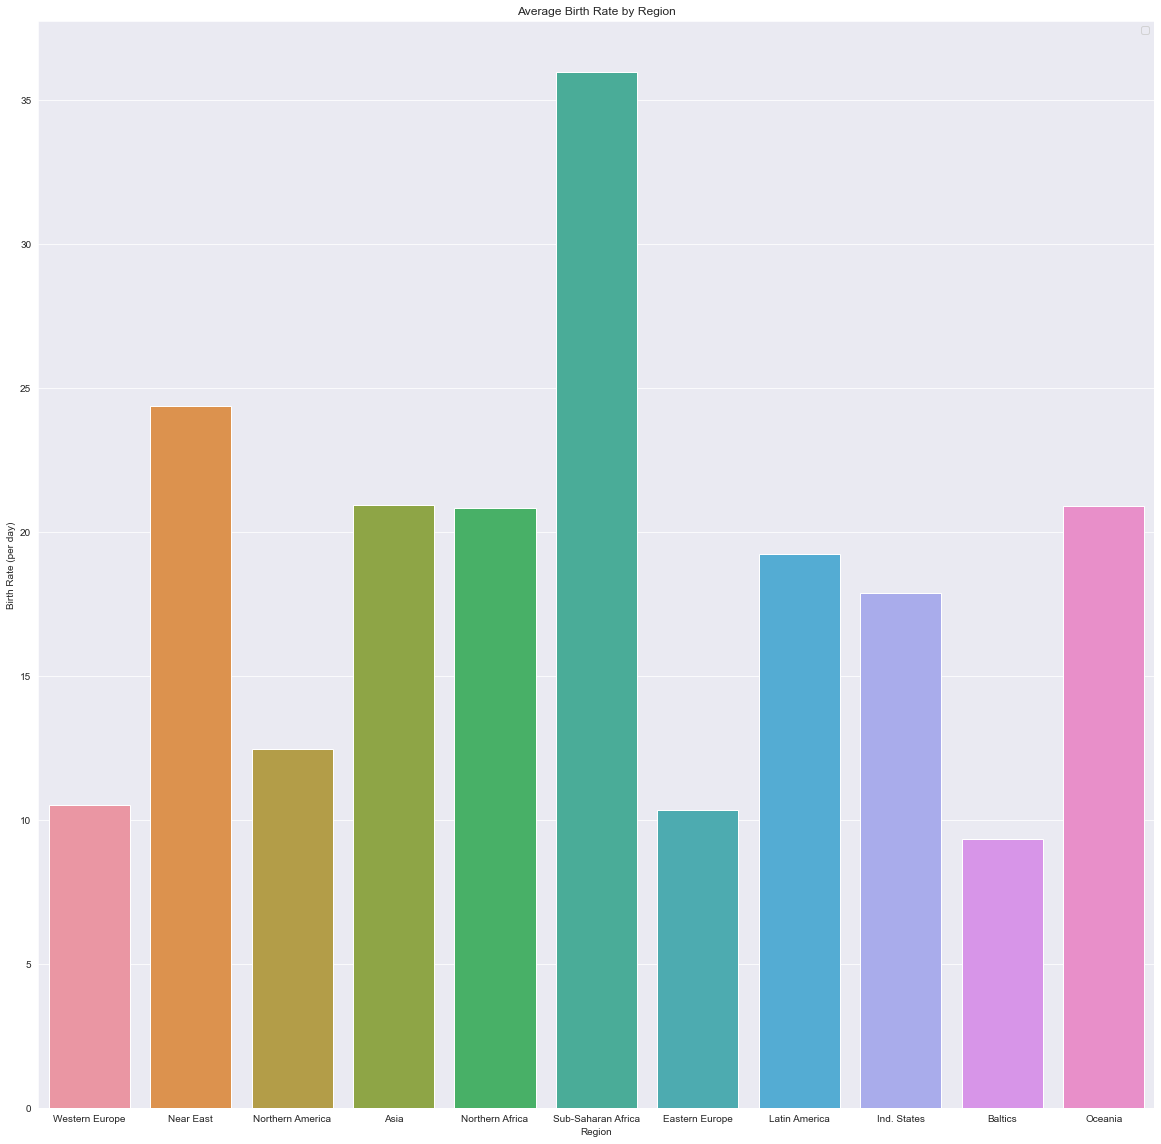

In [80]:
sns.set_style("darkgrid")
sns.barplot(df2.index,'Birthrate',data=df2)
plt.title('Average Birth Rate by Region')
plt.xlabel('Region')
plt.ylabel('Birth Rate (per day)')
plt.legend()
plt.rcParams["figure.figsize"] = (20,50)
plt.show()

C:\Users\hongeeleow\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


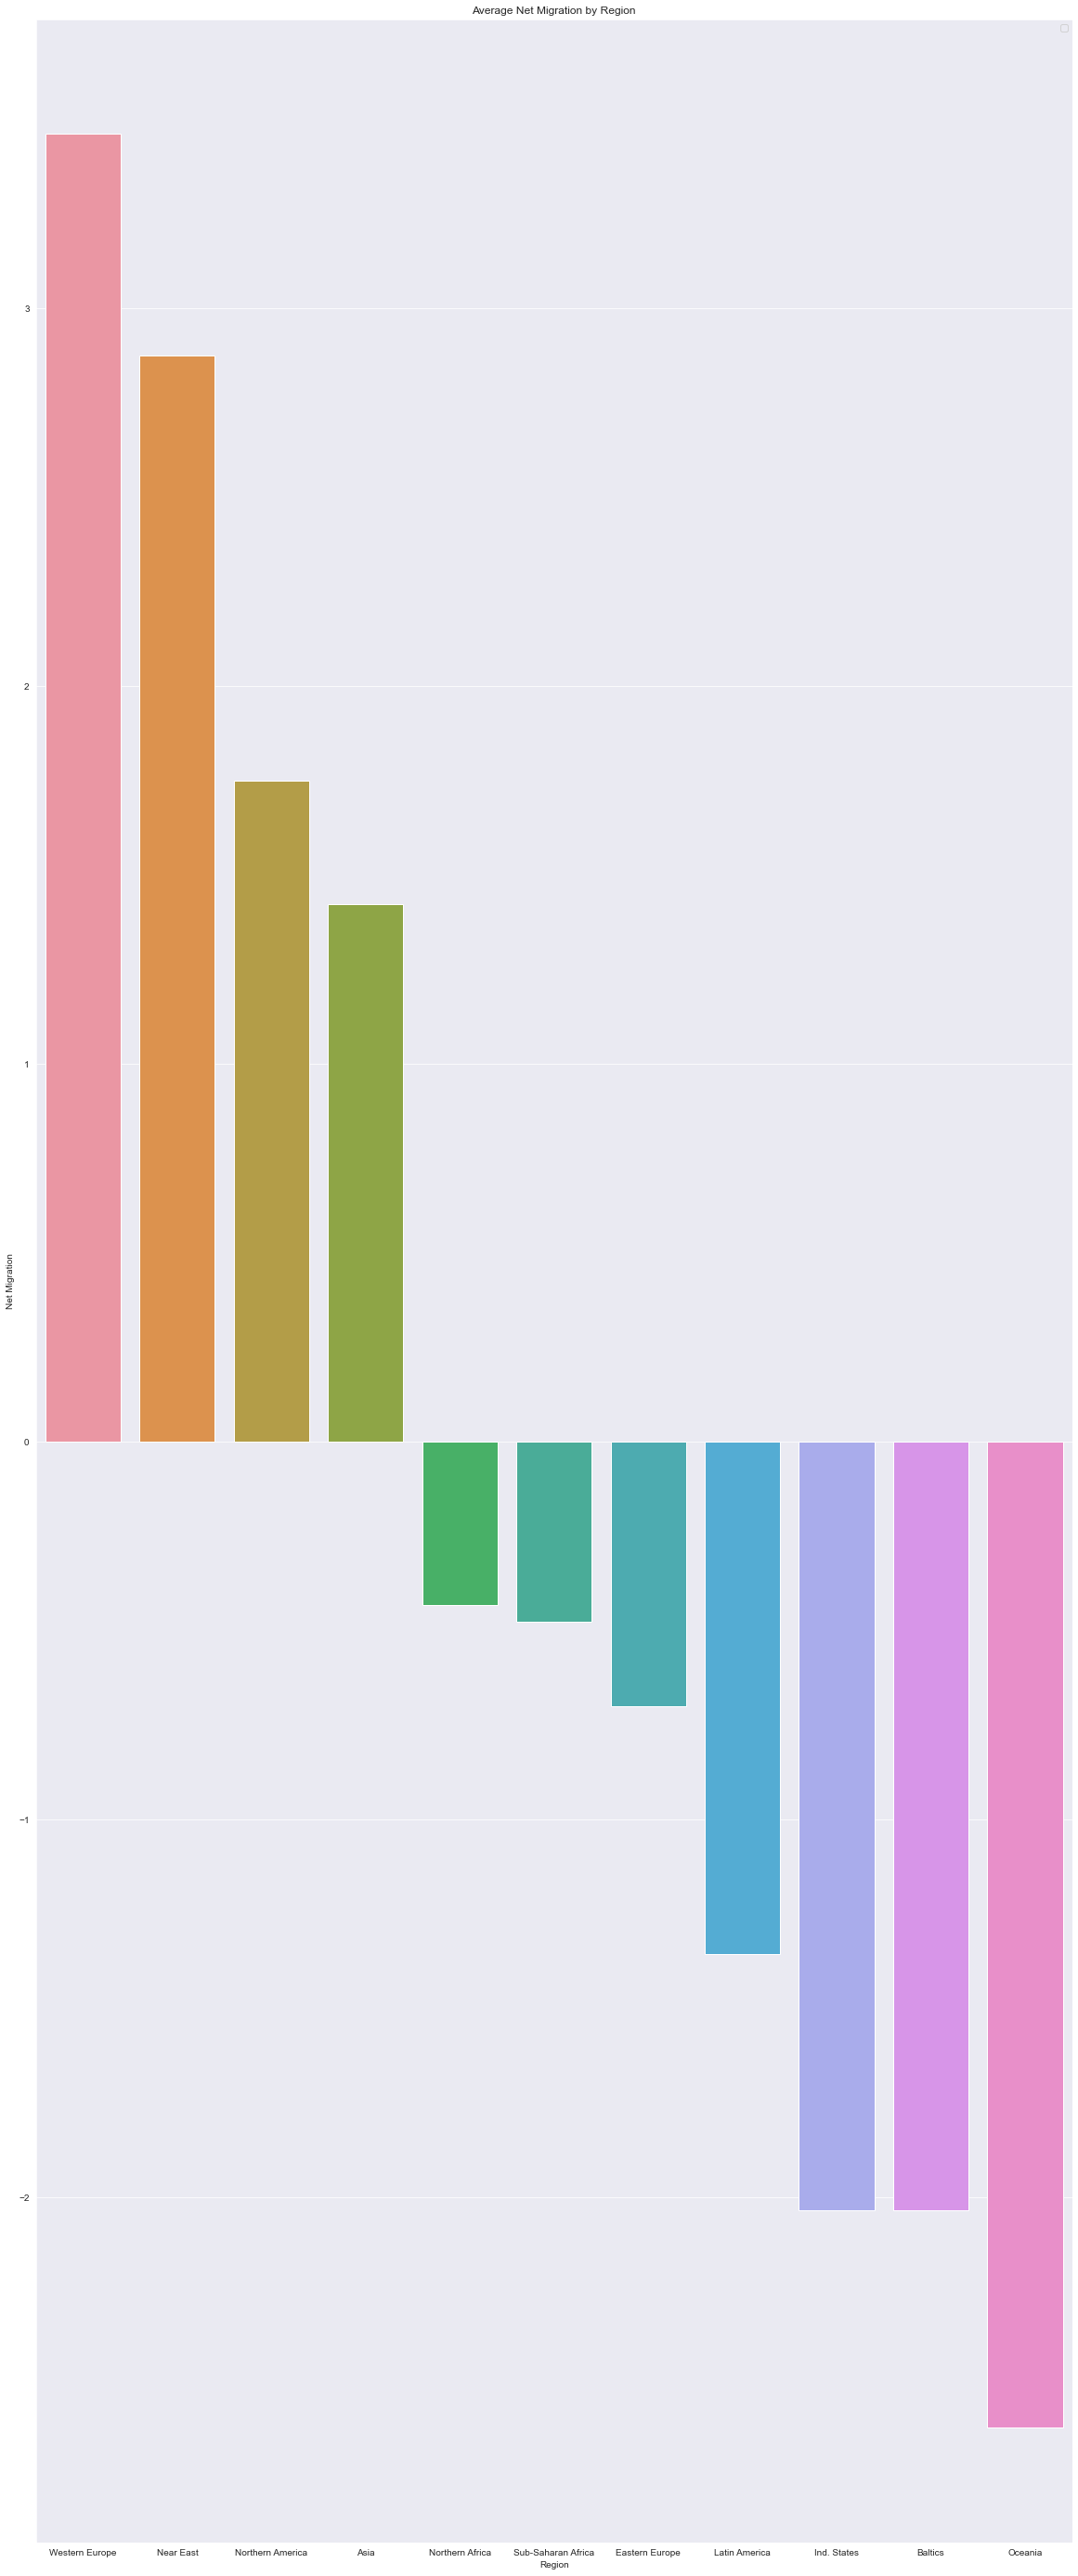

In [81]:
sns.set_style("darkgrid")
sns.barplot(df2.index,'Net migration',data=df2)
plt.title('Average Net Migration by Region')
plt.xlabel('Region')
plt.ylabel('Net Migration')
plt.legend()
plt.rcParams["figure.figsize"] = (20,50)
plt.show()

In [33]:
#Regional Analysis

df1['Region'] = df1['Region'].str.rstrip()
Asia_df = df1[df1['Region']=='ASIA (EX. NEAR EAST)']
Baltics_df = df1[df1['Region']=='BALTICS']
Independent_df = df1[df1['Region']=='C.W. OF IND. STATES']
East_Europe_df = df1[df1['Region']=='EASTERN EUROPE']
Latin_America_df = df1[df1['Region']=='LATIN AMER. & CARIB']
Near_East_df = df1[df1['Region']=='NEAR EAST']
North_Africa_df = df1[df1['Region']=='NORTHERN AFRICA']
North_America_df = df1[df1['Region']=='NORTHERN AMERICA']
Oceania_df = df1[df1['Region']=='OCEANIA']
Sahara_df = df1[df1['Region']=='SUB-SAHARAN AFRICA']
West_Europe_df = df1[df1['Region']=='WESTERN EUROPE']

<ipython-input-33-29fbc60ea834>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Region'] = df1['Region'].str.rstrip()


C:\Users\hongeeleow\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


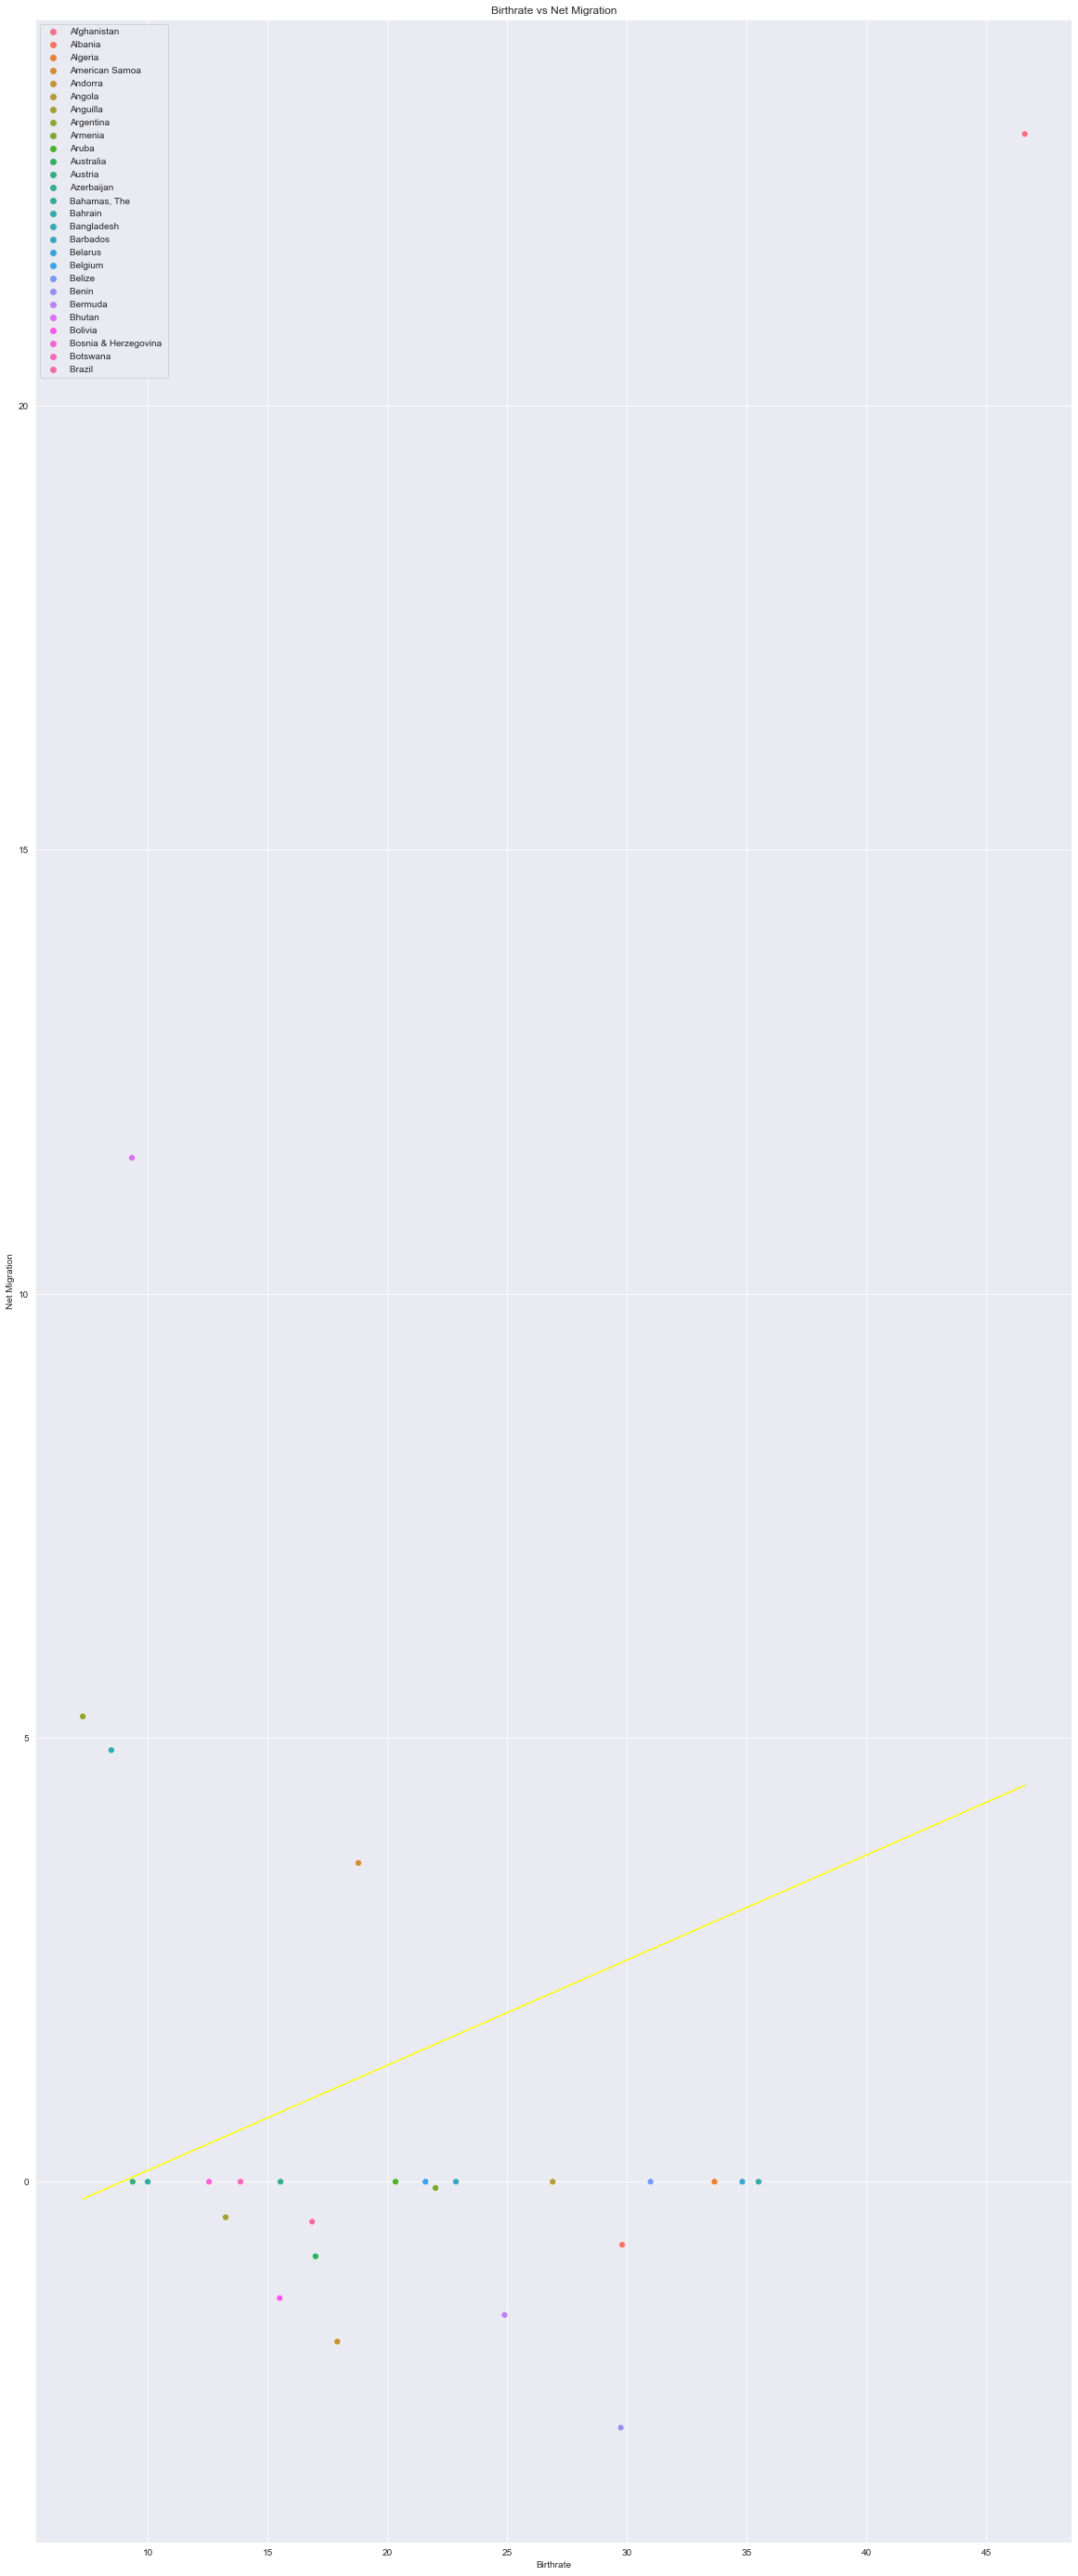

In [82]:
#Birth Rate vs Net Migration:
sns.set_style("darkgrid")
sns.scatterplot(Asia_df['Birthrate'],Asia_df['Net migration'],hue=Asia_df['Country'],s=50)
plt.title('Birthrate vs Net Migration')
plt.xlabel('Birthrate')
plt.ylabel('Net Migration')
plt.legend()
plt.plot(np.unique(Asia_df['Birthrate']), np.poly1d(np.polyfit(Asia_df['Birthrate'],Asia_df['Net migration'], 1))(np.unique(Asia_df['Birthrate'])), color='yellow')
plt.show()

C:\Users\hongeeleow\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


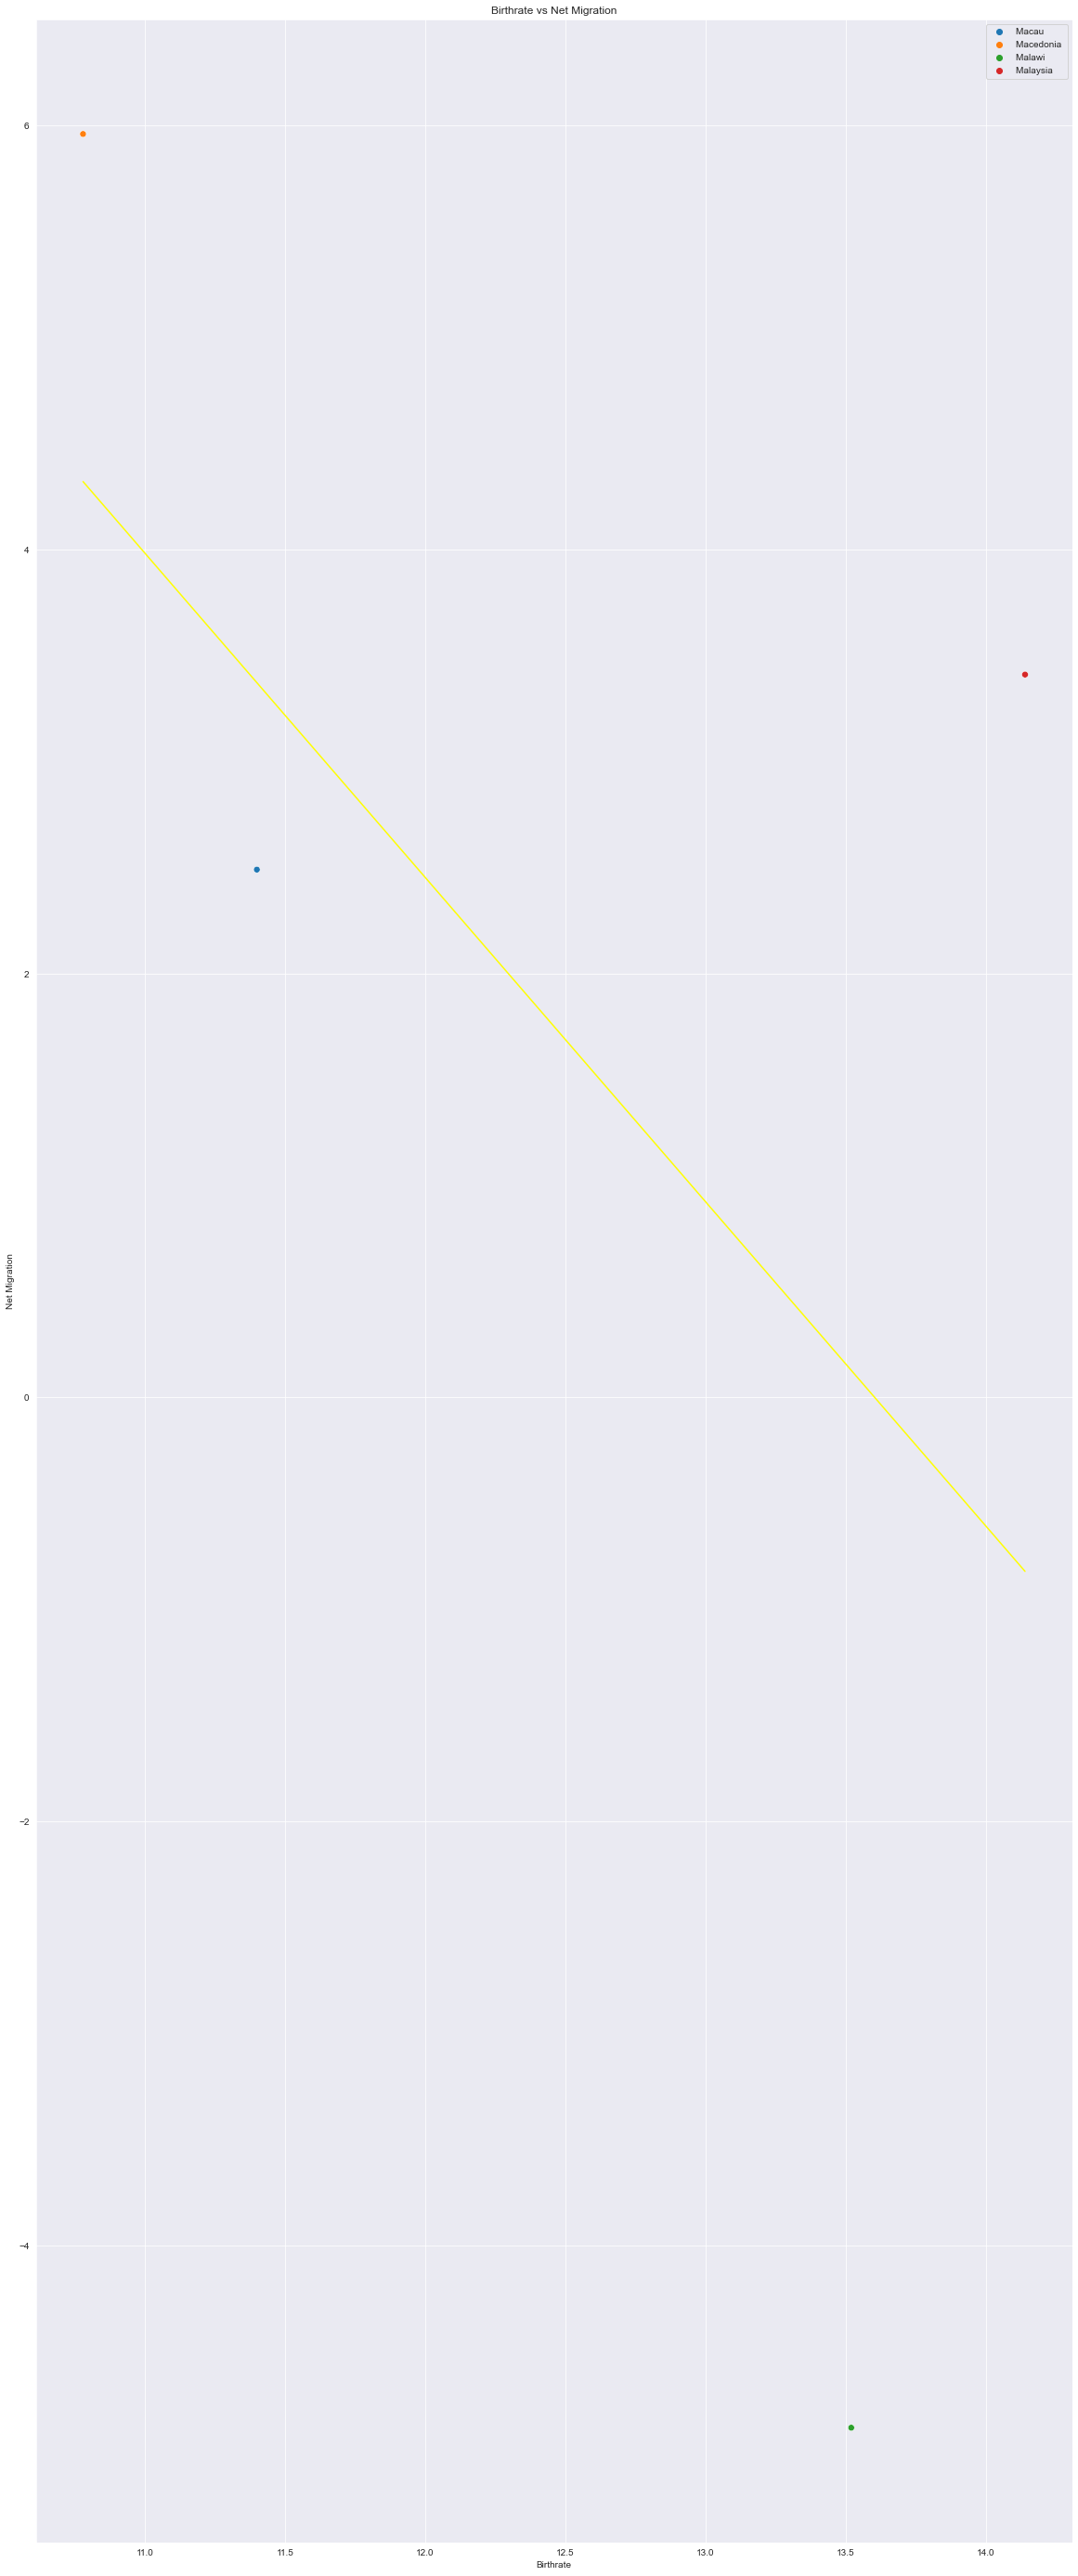

In [83]:
sns.set_style("darkgrid")
sns.scatterplot(North_America_df['Birthrate'],North_America_df['Net migration'],hue=North_America_df['Country'],s=50)
plt.title('Birthrate vs Net Migration')
plt.xlabel('Birthrate')
plt.ylabel('Net Migration')
plt.legend()
plt.plot(np.unique(North_America_df['Birthrate']), np.poly1d(np.polyfit(North_America_df['Birthrate'],North_America_df['Net migration'], 1))(np.unique(North_America_df['Birthrate'])), color='yellow')
plt.show()

C:\Users\hongeeleow\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


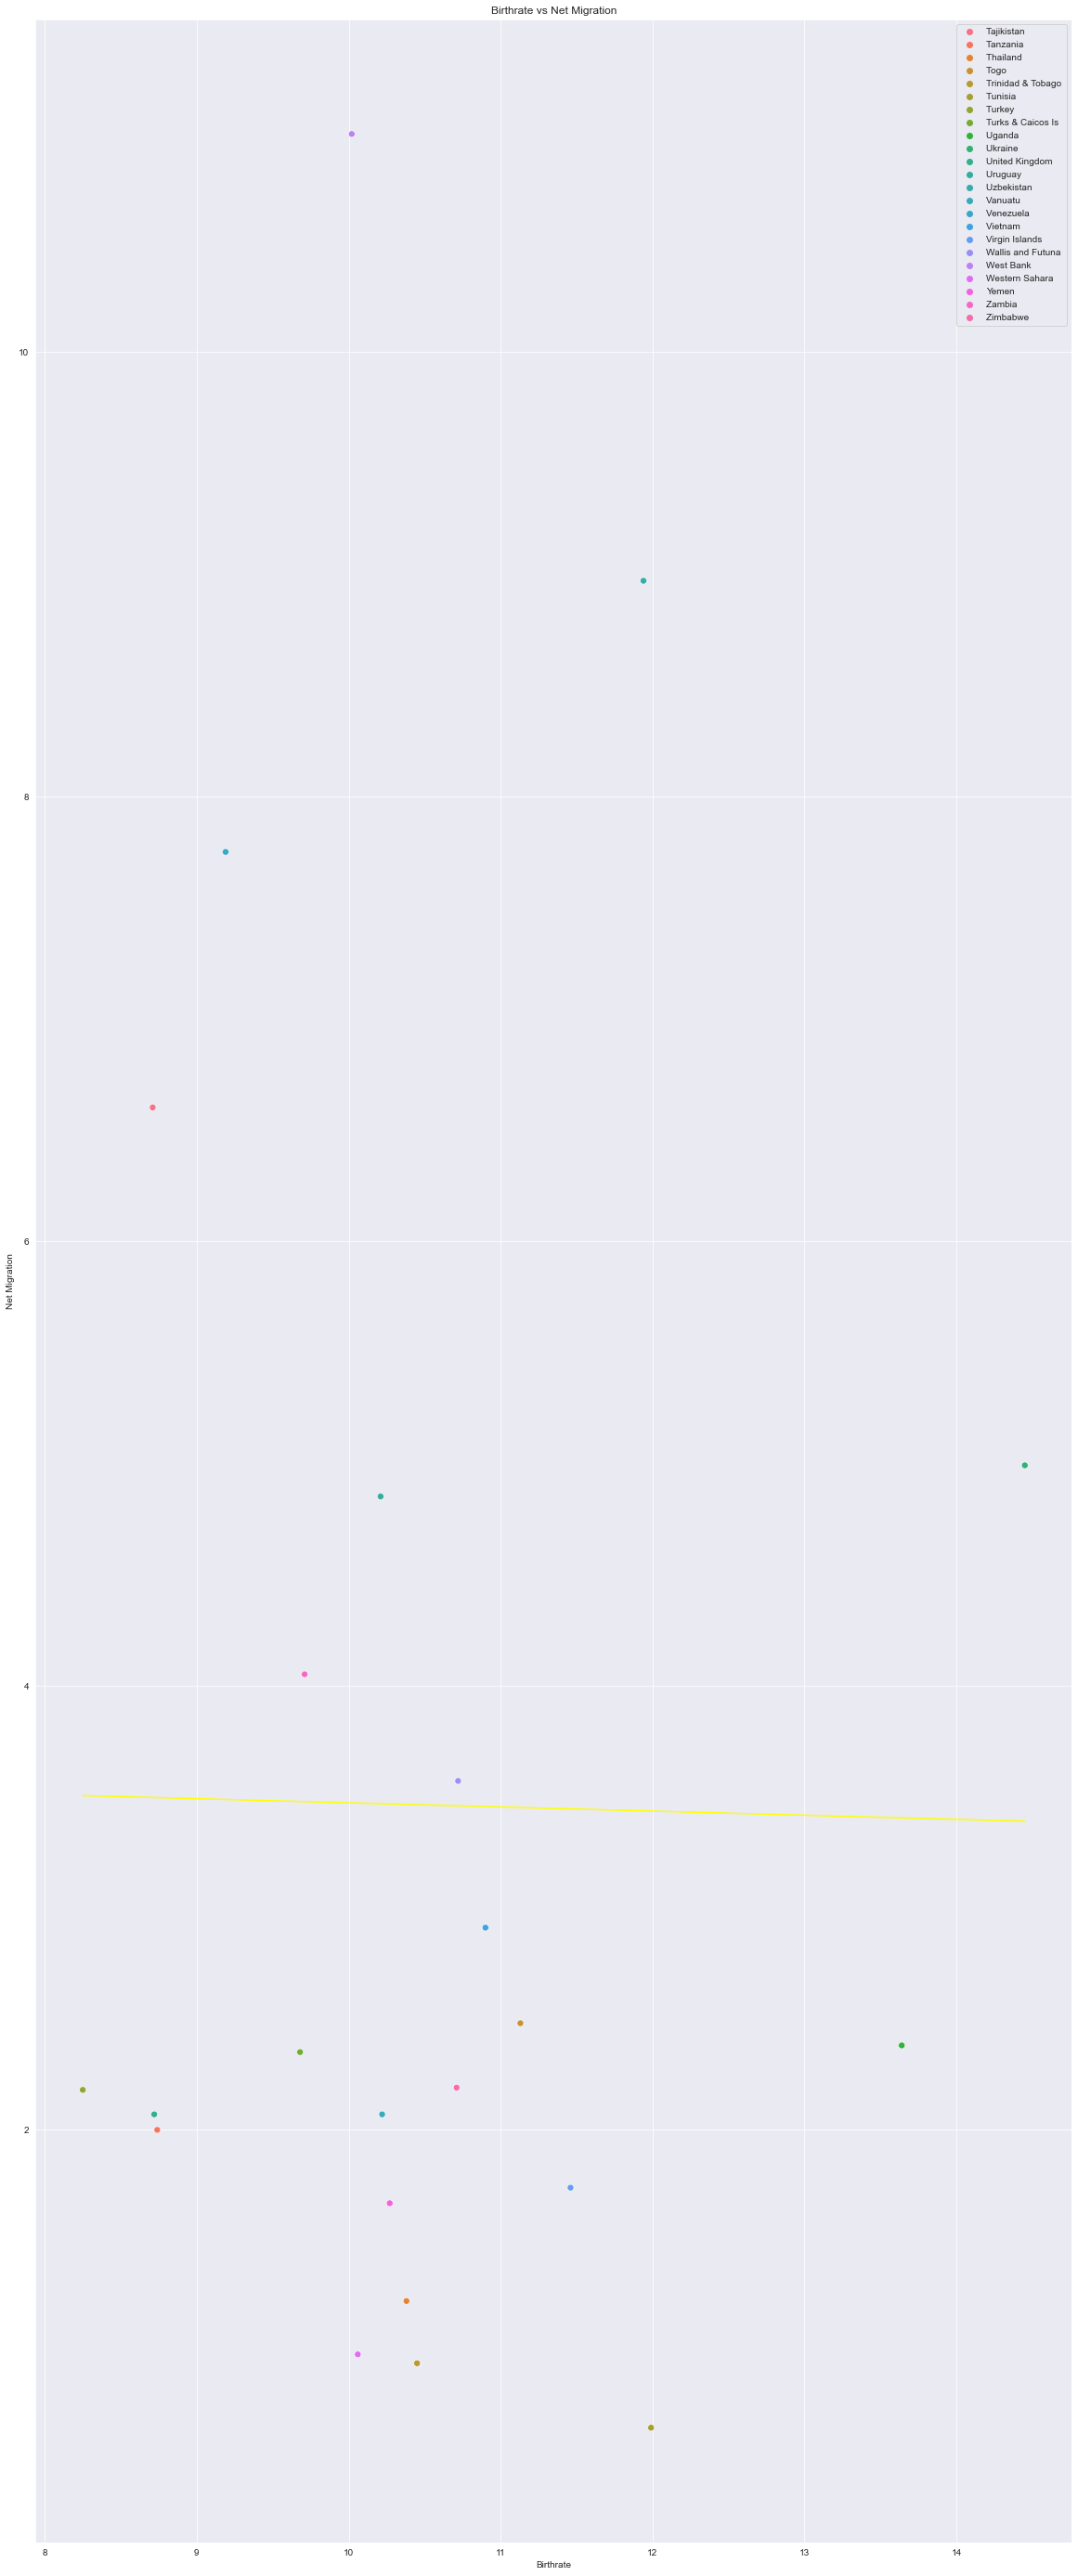

In [84]:
sns.set_style("darkgrid")
sns.scatterplot(West_Europe_df['Birthrate'],West_Europe_df['Net migration'],hue=West_Europe_df['Country'],s=50)
plt.title('Birthrate vs Net Migration')
plt.xlabel('Birthrate')
plt.ylabel('Net Migration')
plt.legend()
plt.plot(np.unique(West_Europe_df['Birthrate']), np.poly1d(np.polyfit(West_Europe_df['Birthrate'],West_Europe_df['Net migration'], 1))(np.unique(West_Europe_df['Birthrate'])), color='yellow')
plt.show()

C:\Users\hongeeleow\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


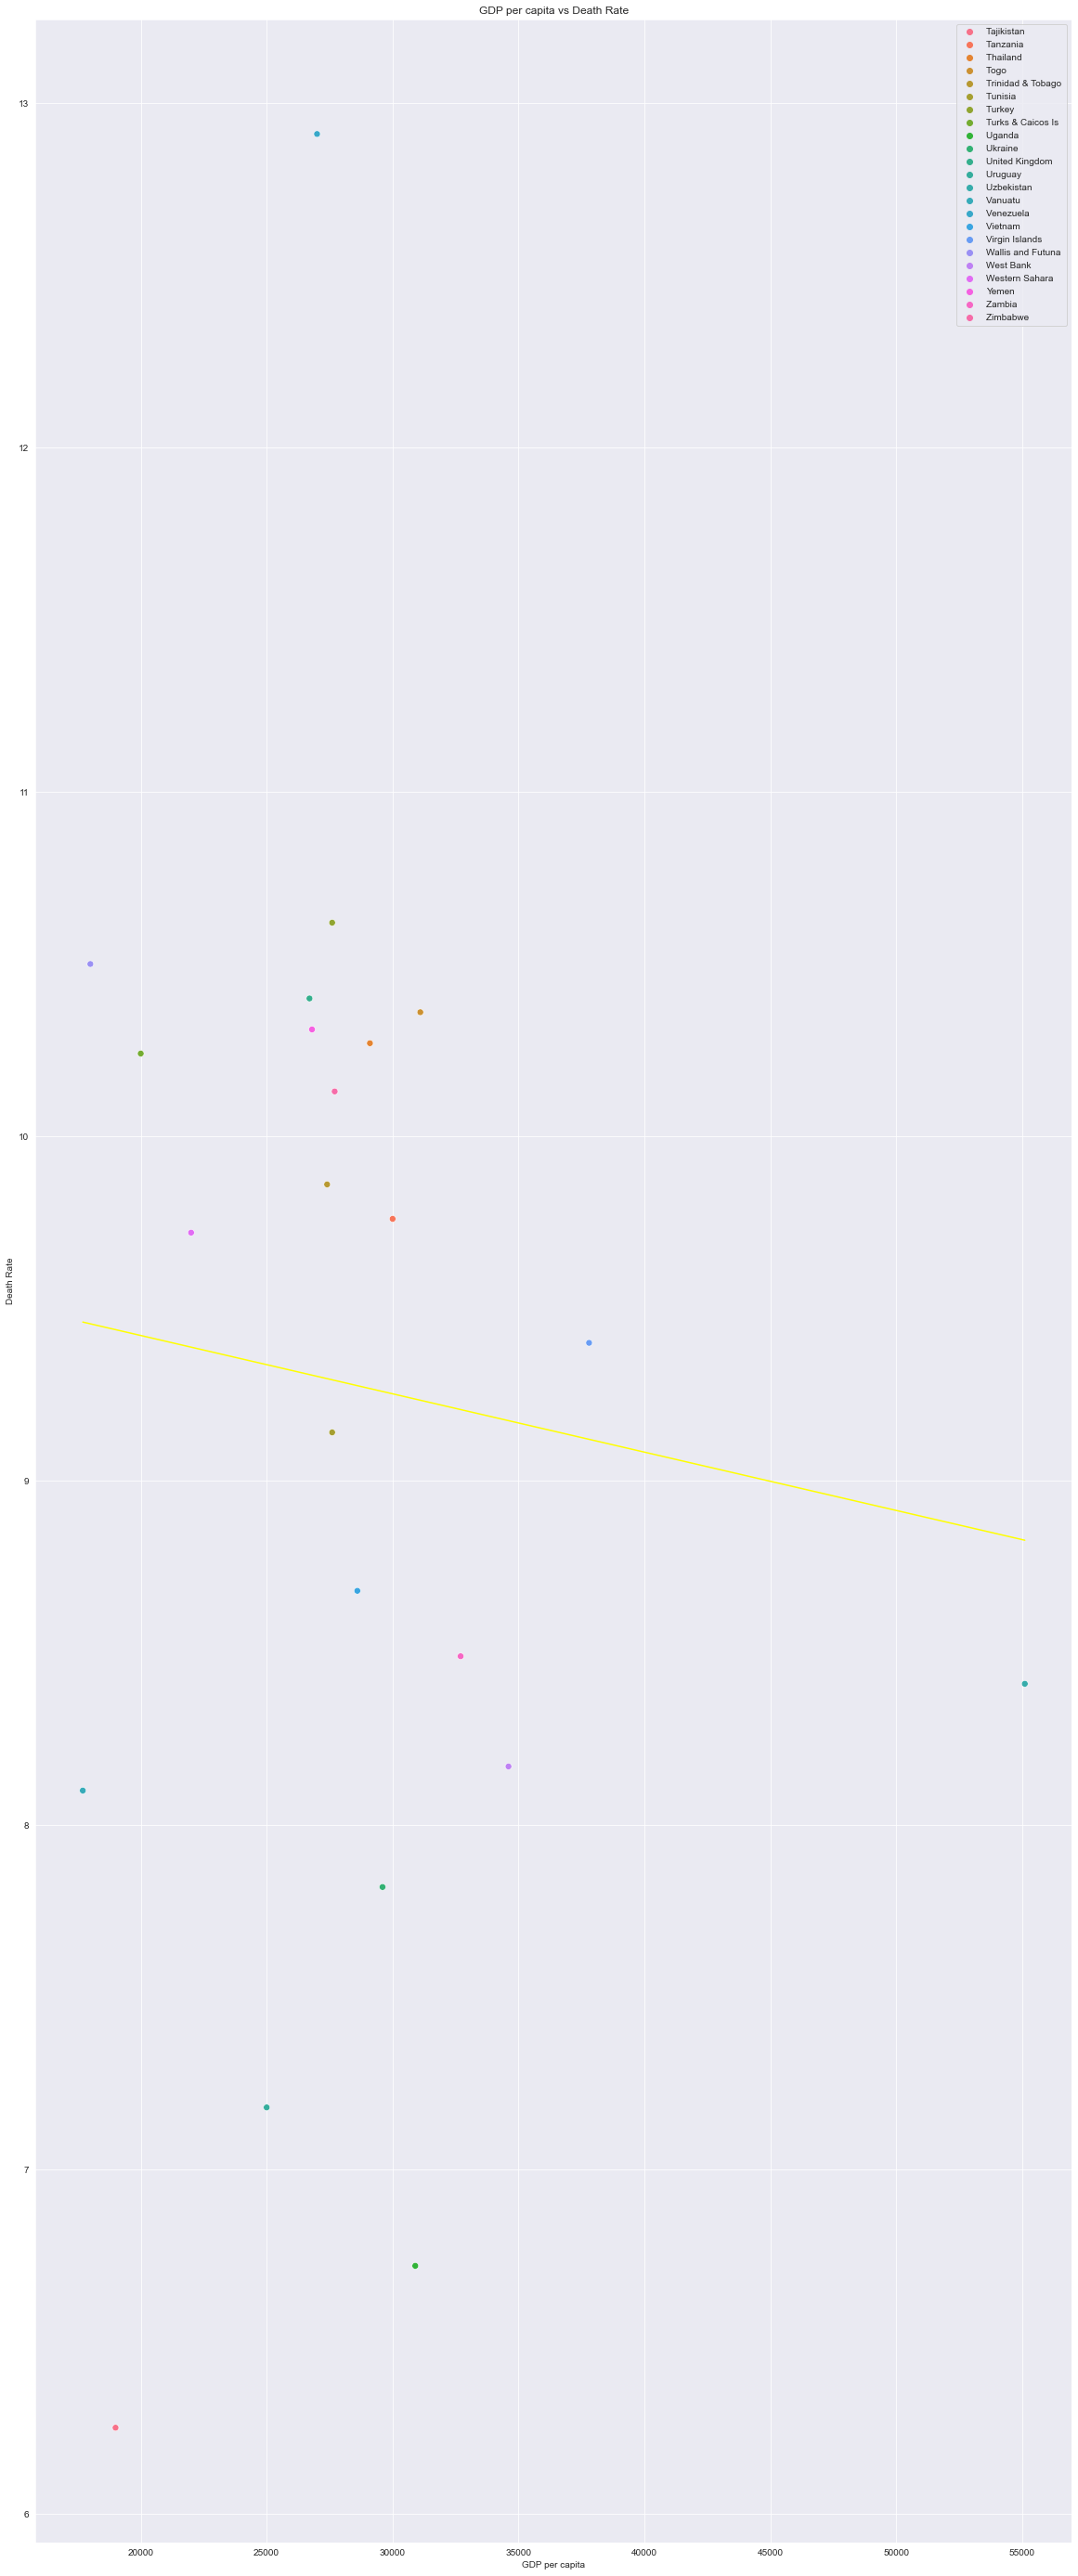

In [85]:
#GDP per capita vs Death Rate:
sns.set_style("darkgrid")
sns.scatterplot(West_Europe_df['GDP per capita'],West_Europe_df['Deathrate'],hue=West_Europe_df['Country'],s=50)
plt.title('GDP per capita vs Death Rate')
plt.xlabel('GDP per capita')
plt.ylabel('Death Rate')
plt.legend()
plt.plot(np.unique(West_Europe_df['GDP per capita']), np.poly1d(np.polyfit(West_Europe_df['GDP per capita'],West_Europe_df['Deathrate'], 1))(np.unique(West_Europe_df['GDP per capita'])), color='yellow')
plt.show()

C:\Users\hongeeleow\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


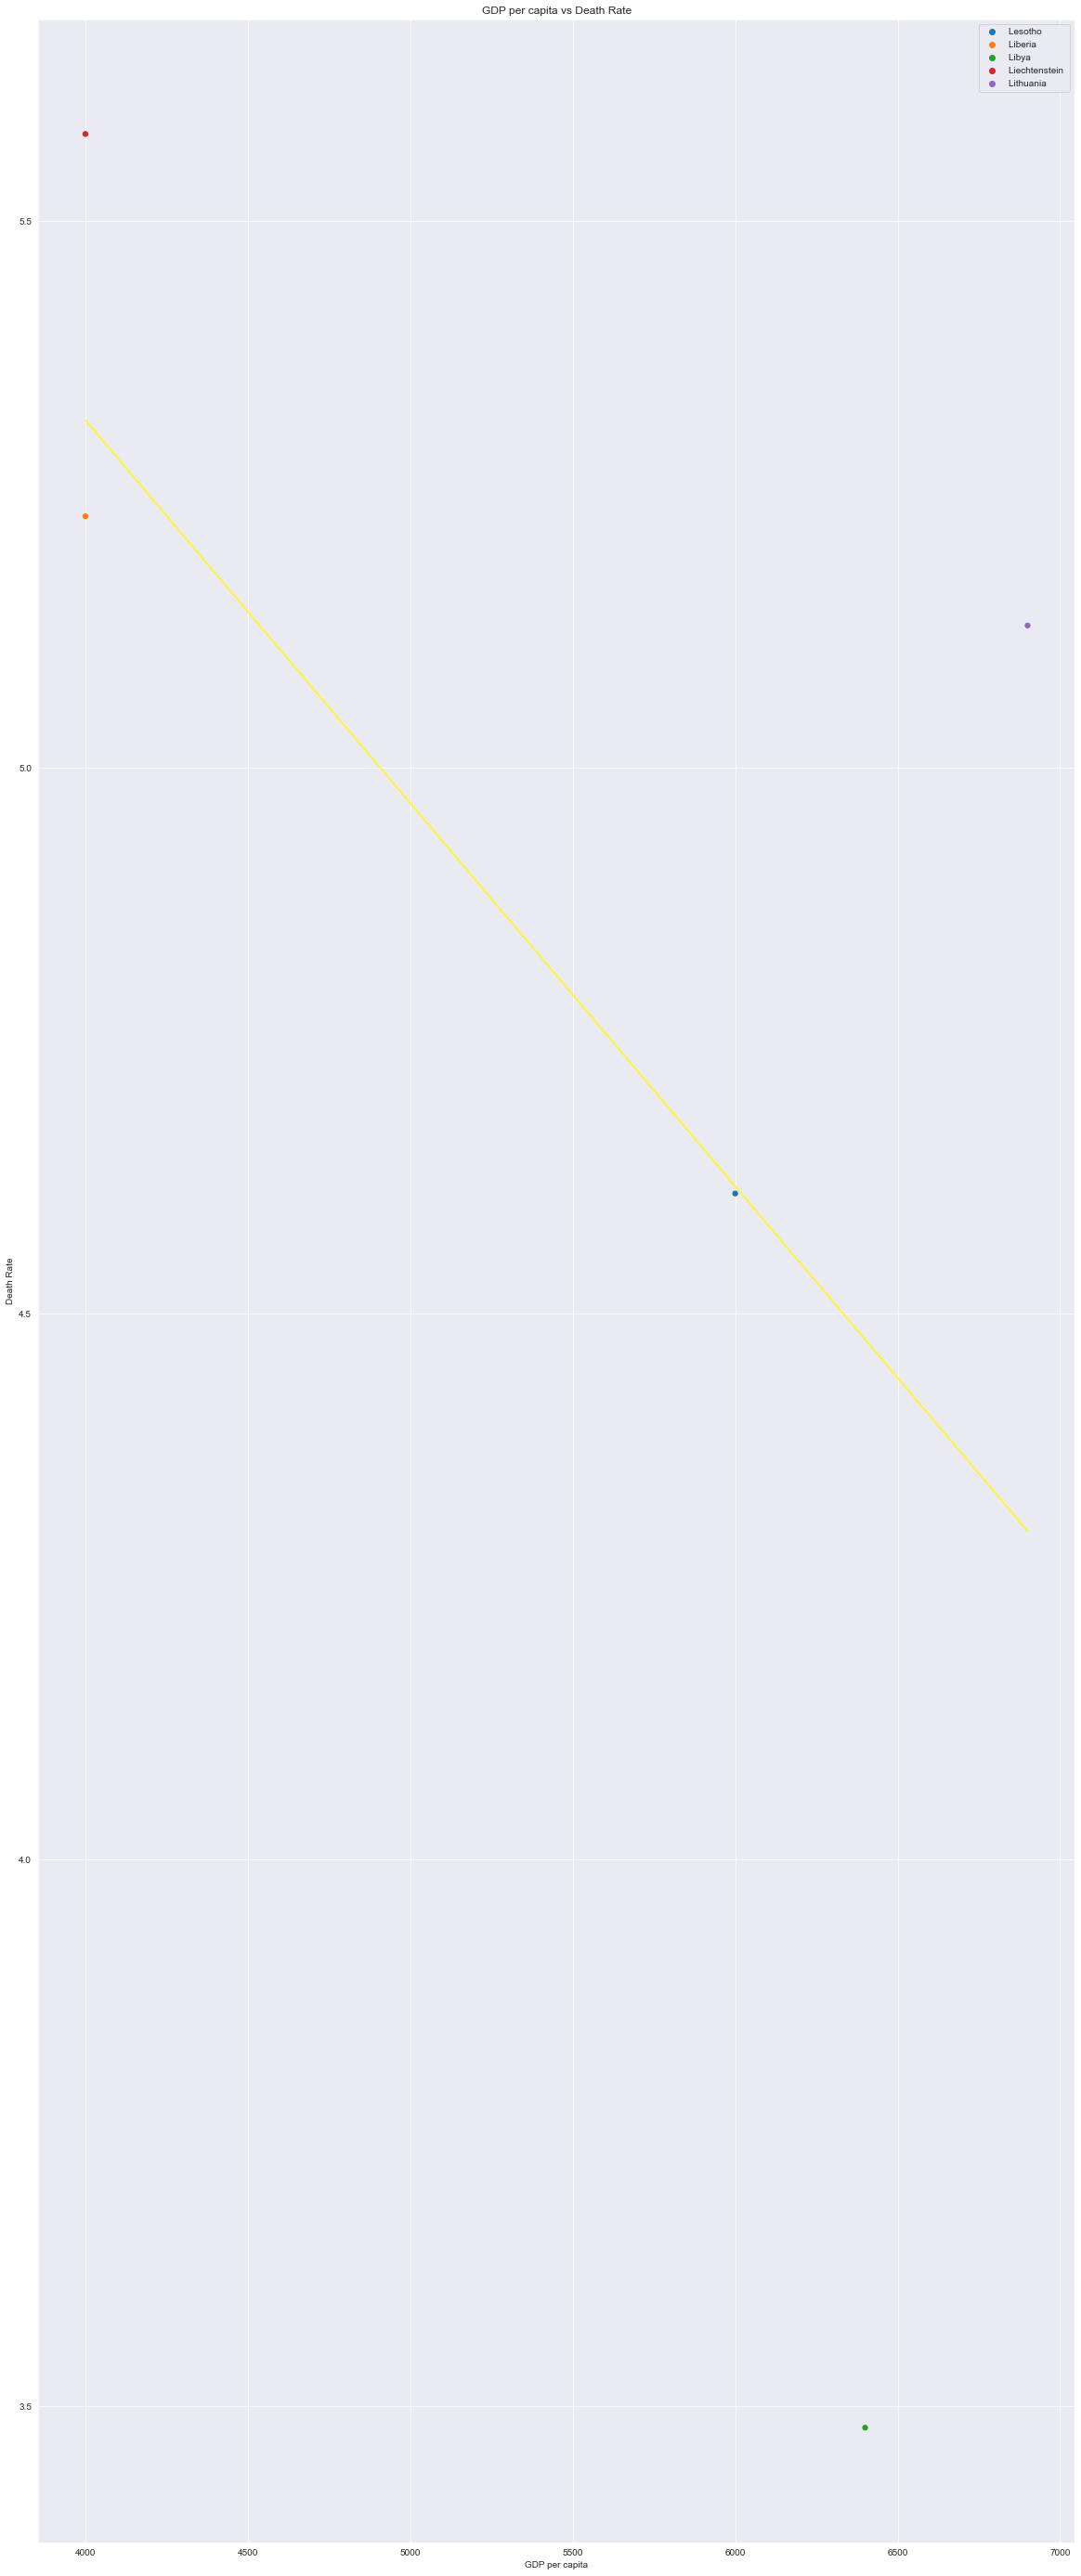

In [86]:
sns.set_style("darkgrid")
sns.scatterplot(North_Africa_df['GDP per capita'],North_Africa_df['Deathrate'],hue=North_Africa_df['Country'],s=50)
plt.title('GDP per capita vs Death Rate')
plt.xlabel('GDP per capita')
plt.ylabel('Death Rate')
plt.legend()
plt.plot(np.unique(North_Africa_df['GDP per capita']), np.poly1d(np.polyfit(North_Africa_df['GDP per capita'],North_Africa_df['Deathrate'], 1))(np.unique(North_Africa_df['GDP per capita'])), color='yellow')
plt.show()

C:\Users\hongeeleow\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


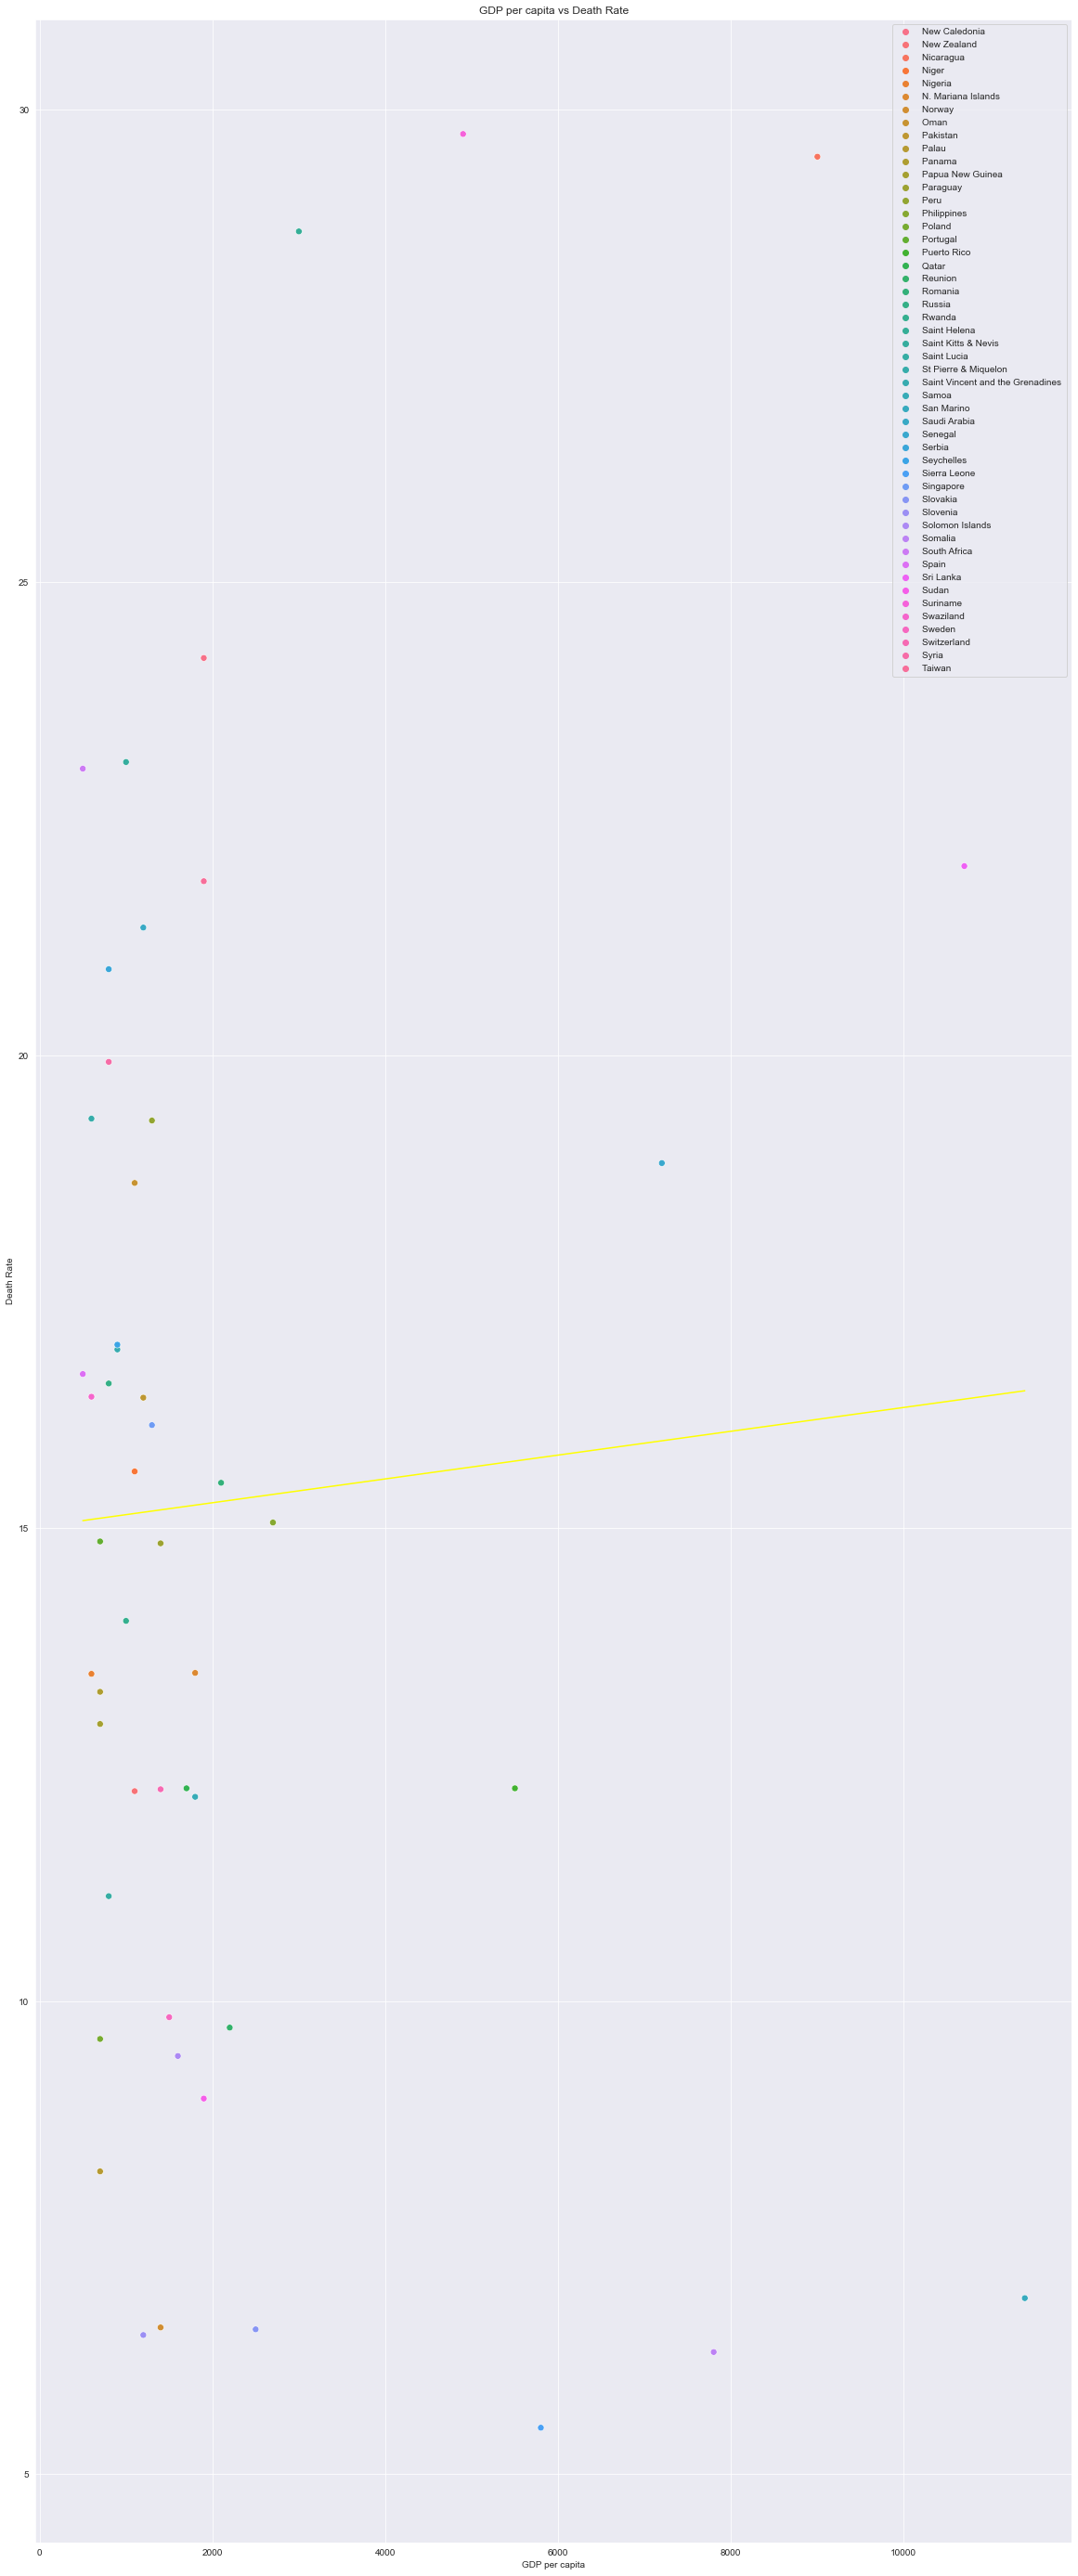

In [87]:
sns.set_style("darkgrid")
sns.scatterplot(Sahara_df['GDP per capita'],Sahara_df['Deathrate'],hue=Sahara_df['Country'],s=50)
plt.title('GDP per capita vs Death Rate')
plt.xlabel('GDP per capita')
plt.ylabel('Death Rate')
plt.legend()
plt.plot(np.unique(Sahara_df['GDP per capita']), np.poly1d(np.polyfit(Sahara_df['GDP per capita'],Sahara_df['Deathrate'], 1))(np.unique(Sahara_df['GDP per capita'])), color='yellow')
plt.show()

C:\Users\hongeeleow\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


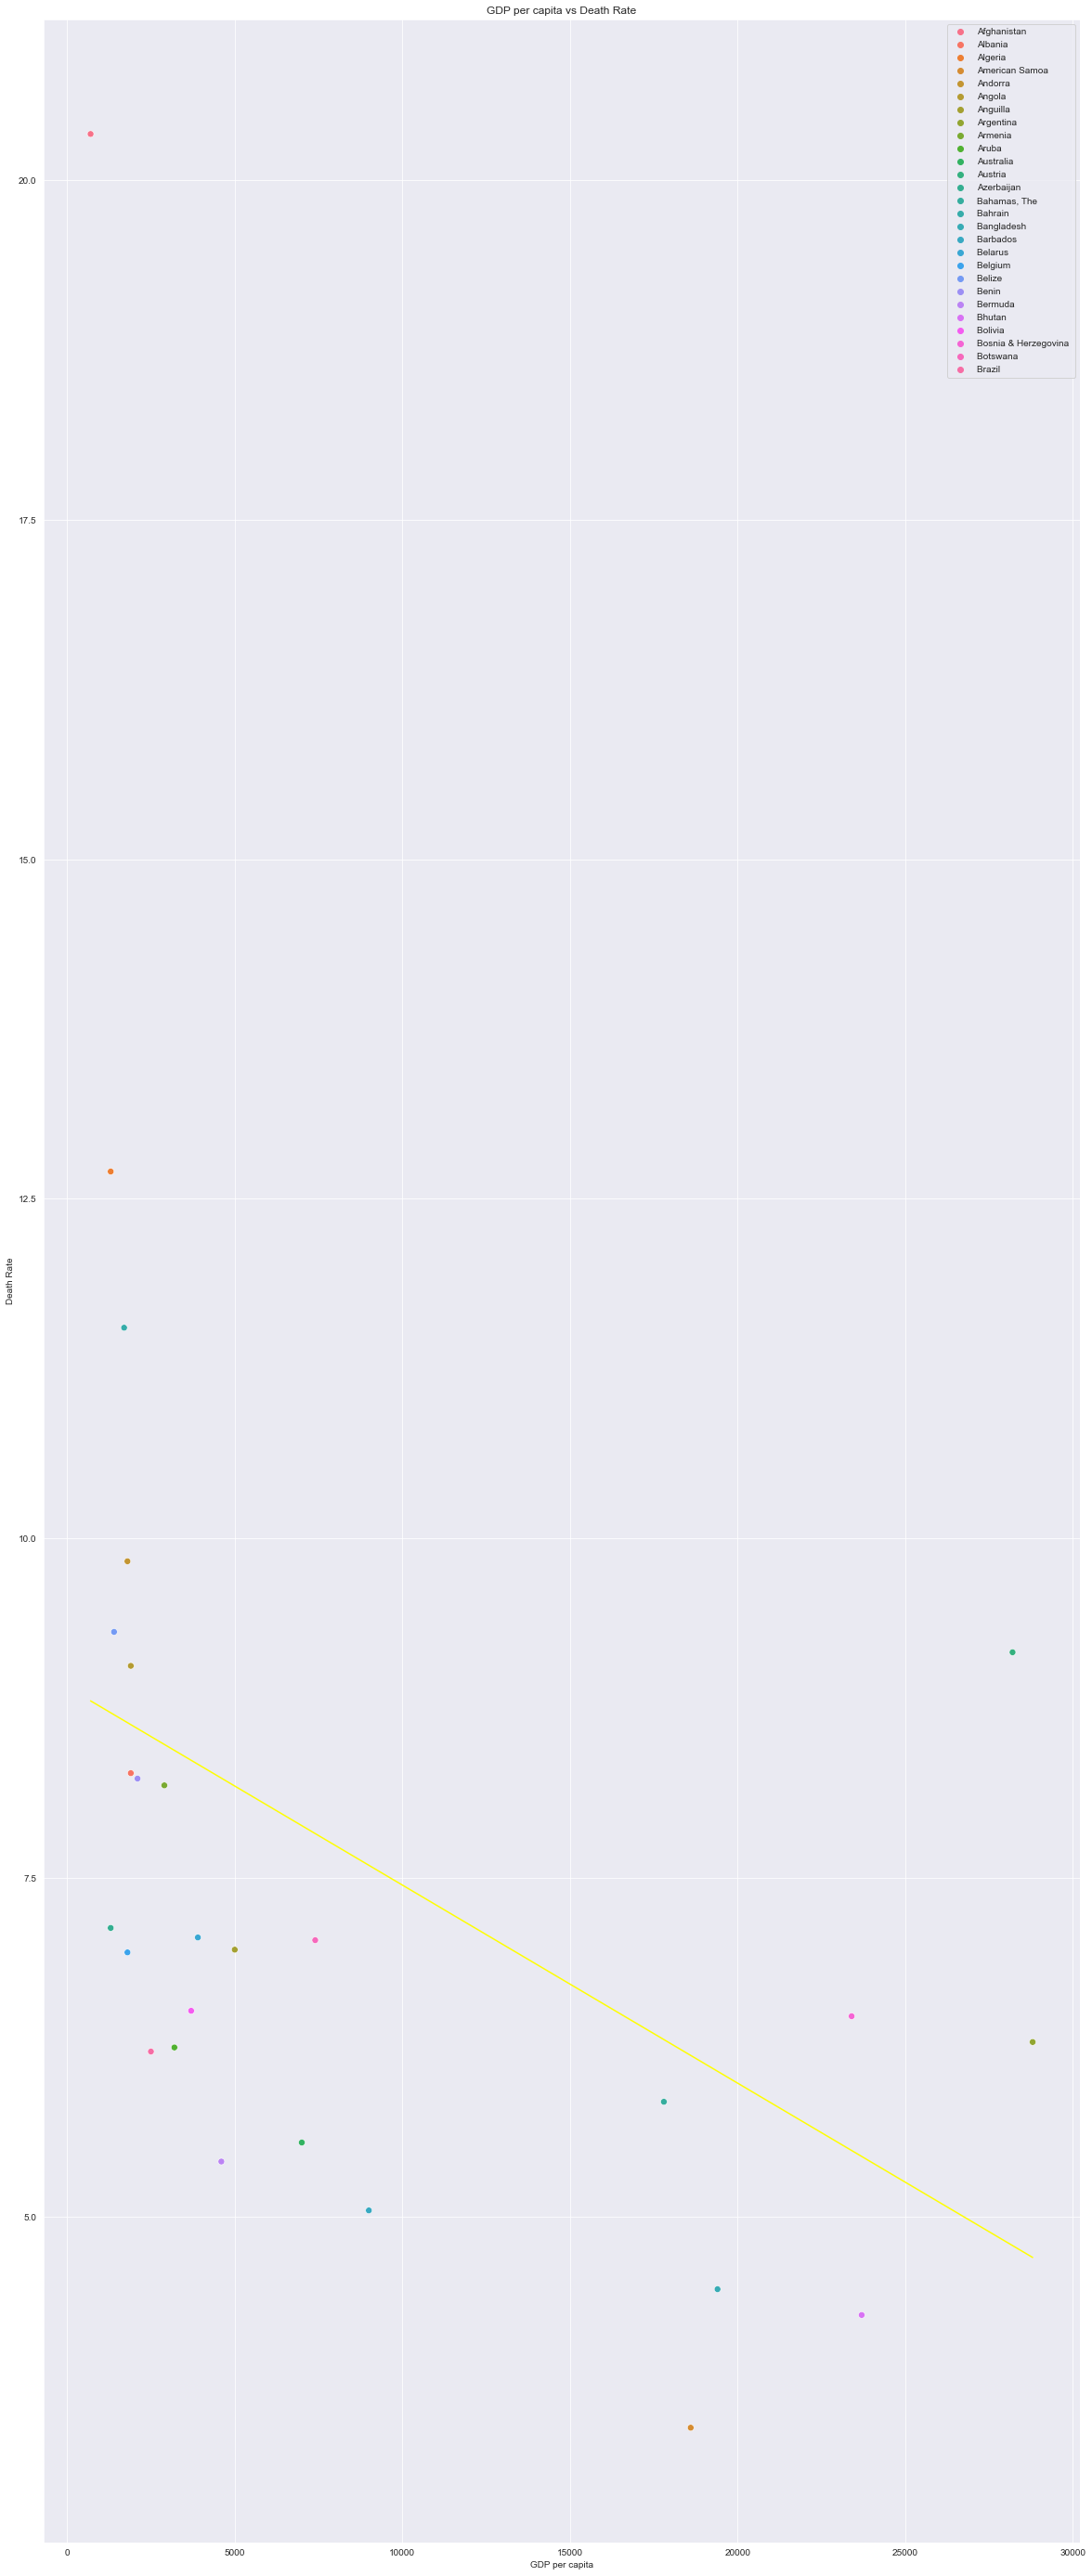

In [88]:
sns.set_style("darkgrid")
sns.scatterplot(Asia_df['GDP per capita'],Asia_df['Deathrate'],hue=Asia_df['Country'],s=50)
plt.title('GDP per capita vs Death Rate')
plt.xlabel('GDP per capita')
plt.ylabel('Death Rate')
plt.legend()
plt.plot(np.unique(Asia_df['GDP per capita']), np.poly1d(np.polyfit(Asia_df['GDP per capita'],Asia_df['Deathrate'], 1))(np.unique(Asia_df['GDP per capita'])), color='yellow')
plt.show()